In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

## Import dependencies

In [53]:
import pandas as pd
import seaborn as sns
from IPython.display import display

from configs import config
from utils.data_viz_utils import create_average_metrics_df, visualize_fairness_metrics_for_prediction_metric

sns.set_theme(style="whitegrid")

## Create average metrics files

In [54]:
STATE = config.DATASET_CONFIG['state']
YEAR = config.DATASET_CONFIG['year']
DATASET_NAME = f"Folktables_{STATE}_{YEAR}"

MODELS_NAMES = [model_config['model_name'] for model_config in config.MODELS_CONFIG]

In [55]:
models_average_results_dct = create_average_metrics_df(DATASET_NAME, MODELS_NAMES)

File with average metrics for LogisticRegression is created
File with average metrics for DecisionTreeClassifier is created
File with average metrics for RandomForestClassifier is created
File with average metrics for KNeighborsClassifier is created


## Visualize average metrics

### Overall metrics visualizations

In [62]:
def visualize_overall_metrics(models_average_results_dct, metrics_names, x_label="Prediction Metrics"):
    overall_metrics_df = pd.DataFrame()
    for model_name in models_average_results_dct.keys():
        model_average_results_df = models_average_results_dct[model_name].reset_index().copy(deep=True)
        model_average_results_df = model_average_results_df.loc[model_average_results_df['index'].isin(metrics_names)]
        overall_model_metrics_df = pd.DataFrame()
        overall_model_metrics_df['overall'] = model_average_results_df['overall']
        overall_model_metrics_df['metric'] = model_average_results_df['index']
        overall_model_metrics_df['model_name'] = model_name
        overall_metrics_df = pd.concat([overall_metrics_df, overall_model_metrics_df])

    # Draw a nested barplot by species and sex
    g = sns.catplot(
        data=overall_metrics_df, kind="bar",
        x="overall", y="metric", hue="model_name",
        errorbar="sd", palette="bright", alpha=.8, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", x_label)
    g.legend.set_title("")


def overall_metric_comparison(prediction_metric_name, dataset_name, models_average_results_dct):
    comparison_df = pd.DataFrame(columns=('Dataset_Name', 'Metric_Name', 'Model_Name', 'Metric_Value'))
    for idx, model_name in enumerate(models_average_results_dct.keys()):
        model_average_results_df = models_average_results_dct[model_name]
        comparison_df.loc[idx] = [dataset_name, prediction_metric_name, model_name, model_average_results_df['overall'].loc[prediction_metric_name]]

    return comparison_df.sort_values(by=['Metric_Value'], ascending=False, axis=0)

In [63]:
def display_all_overall_metrics(dataset_name, model_names, models_average_results_dct):
    overall_metrics = list(models_average_results_dct[list(models_average_results_dct.keys())[0]].index)

    for overall_metric in overall_metrics:
        comparison_df = overall_metric_comparison(overall_metric, dataset_name, models_average_results_dct)
        print('#' * 30, f' {overall_metric} Comparison ', '#' * 30)
        display(comparison_df)

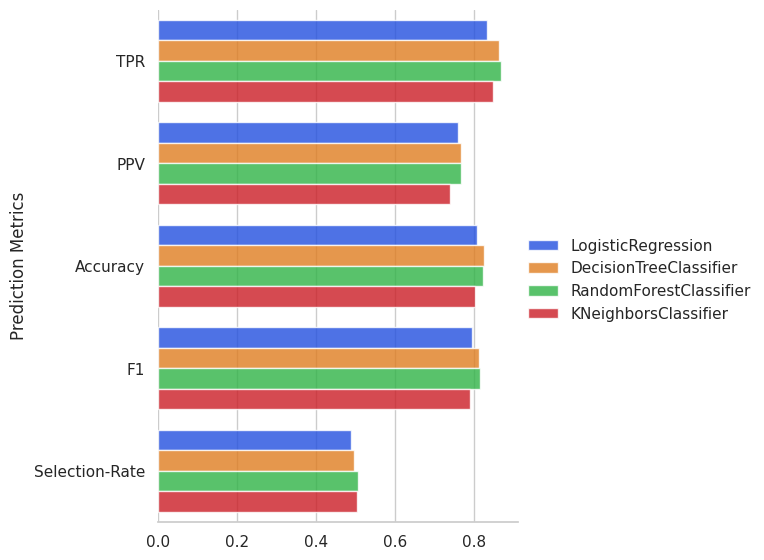

In [58]:
visualize_overall_metrics(models_average_results_dct,
                          metrics_names=['TPR', 'PPV', 'Accuracy', 'F1', 'Selection-Rate'])

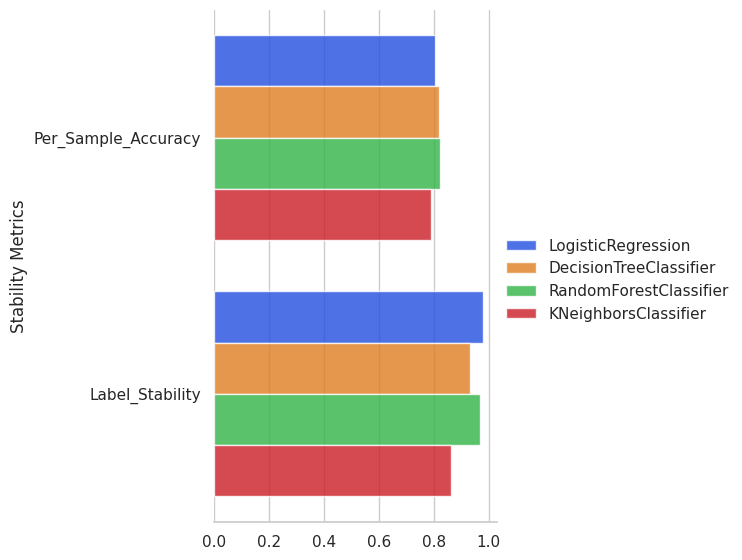

In [59]:
visualize_overall_metrics(models_average_results_dct,
                          metrics_names=['Per_Sample_Accuracy', 'Label_Stability'],
                          x_label="Stability Metrics")

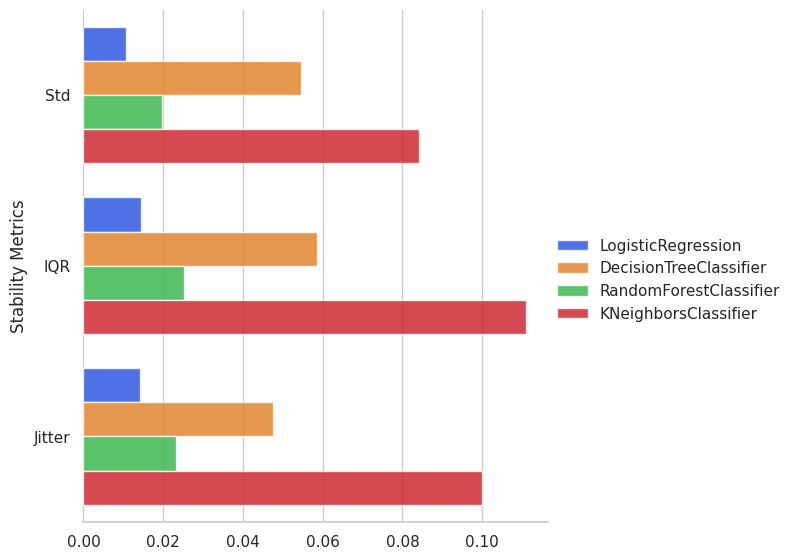

In [60]:
visualize_overall_metrics(models_average_results_dct,
                          metrics_names=['Std', 'IQR', 'Jitter'],
                          x_label="Stability Metrics")

In [64]:
display_all_overall_metrics(DATASET_NAME, MODELS_NAMES, models_average_results_dct)

##############################  General_Ensemble_Accuracy Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
1,Folktables_GA_2018,General_Ensemble_Accuracy,DecisionTreeClassifier,0.8254
2,Folktables_GA_2018,General_Ensemble_Accuracy,RandomForestClassifier,0.8236
0,Folktables_GA_2018,General_Ensemble_Accuracy,LogisticRegression,0.8069
3,Folktables_GA_2018,General_Ensemble_Accuracy,KNeighborsClassifier,0.8014


##############################  Mean Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
1,Folktables_GA_2018,Mean,DecisionTreeClassifier,0.5537
2,Folktables_GA_2018,Mean,RandomForestClassifier,0.5532
0,Folktables_GA_2018,Mean,LogisticRegression,0.5529
3,Folktables_GA_2018,Mean,KNeighborsClassifier,0.5398


##############################  Std Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,Std,KNeighborsClassifier,0.0841
1,Folktables_GA_2018,Std,DecisionTreeClassifier,0.0546
2,Folktables_GA_2018,Std,RandomForestClassifier,0.0198
0,Folktables_GA_2018,Std,LogisticRegression,0.0108


##############################  IQR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,IQR,KNeighborsClassifier,0.1109
1,Folktables_GA_2018,IQR,DecisionTreeClassifier,0.0587
2,Folktables_GA_2018,IQR,RandomForestClassifier,0.0253
0,Folktables_GA_2018,IQR,LogisticRegression,0.0144


##############################  Entropy Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
1,Folktables_GA_2018,Entropy,DecisionTreeClassifier,0.0784
0,Folktables_GA_2018,Entropy,LogisticRegression,0.0000
2,Folktables_GA_2018,Entropy,RandomForestClassifier,0.0000
3,Folktables_GA_2018,Entropy,KNeighborsClassifier,0.0000


##############################  Jitter Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,Jitter,KNeighborsClassifier,0.0999
1,Folktables_GA_2018,Jitter,DecisionTreeClassifier,0.0475
2,Folktables_GA_2018,Jitter,RandomForestClassifier,0.0233
0,Folktables_GA_2018,Jitter,LogisticRegression,0.0142


##############################  Per_Sample_Accuracy Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,Per_Sample_Accuracy,RandomForestClassifier,0.8226
1,Folktables_GA_2018,Per_Sample_Accuracy,DecisionTreeClassifier,0.8195
0,Folktables_GA_2018,Per_Sample_Accuracy,LogisticRegression,0.8061
3,Folktables_GA_2018,Per_Sample_Accuracy,KNeighborsClassifier,0.7899


##############################  Label_Stability Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
0,Folktables_GA_2018,Label_Stability,LogisticRegression,0.9801
2,Folktables_GA_2018,Label_Stability,RandomForestClassifier,0.9678
1,Folktables_GA_2018,Label_Stability,DecisionTreeClassifier,0.9338
3,Folktables_GA_2018,Label_Stability,KNeighborsClassifier,0.8624


##############################  TPR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,TPR,RandomForestClassifier,0.869271
1,Folktables_GA_2018,TPR,DecisionTreeClassifier,0.864128
3,Folktables_GA_2018,TPR,KNeighborsClassifier,0.847341
0,Folktables_GA_2018,TPR,LogisticRegression,0.831983


##############################  TNR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
1,Folktables_GA_2018,TNR,DecisionTreeClassifier,0.794954
2,Folktables_GA_2018,TNR,RandomForestClassifier,0.786738
0,Folktables_GA_2018,TNR,LogisticRegression,0.786559
3,Folktables_GA_2018,TNR,KNeighborsClassifier,0.765383


##############################  PPV Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
1,Folktables_GA_2018,PPV,DecisionTreeClassifier,0.768075
2,Folktables_GA_2018,PPV,RandomForestClassifier,0.766964
0,Folktables_GA_2018,PPV,LogisticRegression,0.758882
3,Folktables_GA_2018,PPV,KNeighborsClassifier,0.739455


##############################  FNR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
0,Folktables_GA_2018,FNR,LogisticRegression,0.168017
3,Folktables_GA_2018,FNR,KNeighborsClassifier,0.152659
1,Folktables_GA_2018,FNR,DecisionTreeClassifier,0.135872
2,Folktables_GA_2018,FNR,RandomForestClassifier,0.130729


##############################  FPR Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,FPR,KNeighborsClassifier,0.234617
0,Folktables_GA_2018,FPR,LogisticRegression,0.213441
2,Folktables_GA_2018,FPR,RandomForestClassifier,0.213262
1,Folktables_GA_2018,FPR,DecisionTreeClassifier,0.205046


##############################  Accuracy Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
1,Folktables_GA_2018,Accuracy,DecisionTreeClassifier,0.825393
2,Folktables_GA_2018,Accuracy,RandomForestClassifier,0.823608
0,Folktables_GA_2018,Accuracy,LogisticRegression,0.806851
3,Folktables_GA_2018,Accuracy,KNeighborsClassifier,0.801448


##############################  F1 Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,F1,RandomForestClassifier,0.814919
1,Folktables_GA_2018,F1,DecisionTreeClassifier,0.813275
0,Folktables_GA_2018,F1,LogisticRegression,0.793753
3,Folktables_GA_2018,F1,KNeighborsClassifier,0.789731


##############################  Selection-Rate Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
2,Folktables_GA_2018,Selection-Rate,RandomForestClassifier,0.506321
3,Folktables_GA_2018,Selection-Rate,KNeighborsClassifier,0.504239
1,Folktables_GA_2018,Selection-Rate,DecisionTreeClassifier,0.495067
0,Folktables_GA_2018,Selection-Rate,LogisticRegression,0.489763


##############################  Positive-Rate Comparison  ##############################


,Dataset_Name,Metric_Name,Model_Name,Metric_Value
3,Folktables_GA_2018,Positive-Rate,KNeighborsClassifier,1.145899
2,Folktables_GA_2018,Positive-Rate,RandomForestClassifier,1.133393
1,Folktables_GA_2018,Positive-Rate,DecisionTreeClassifier,1.125056
0,Folktables_GA_2018,Positive-Rate,LogisticRegression,1.096327


### Metrics visualizations by groups

#### Label_Stability

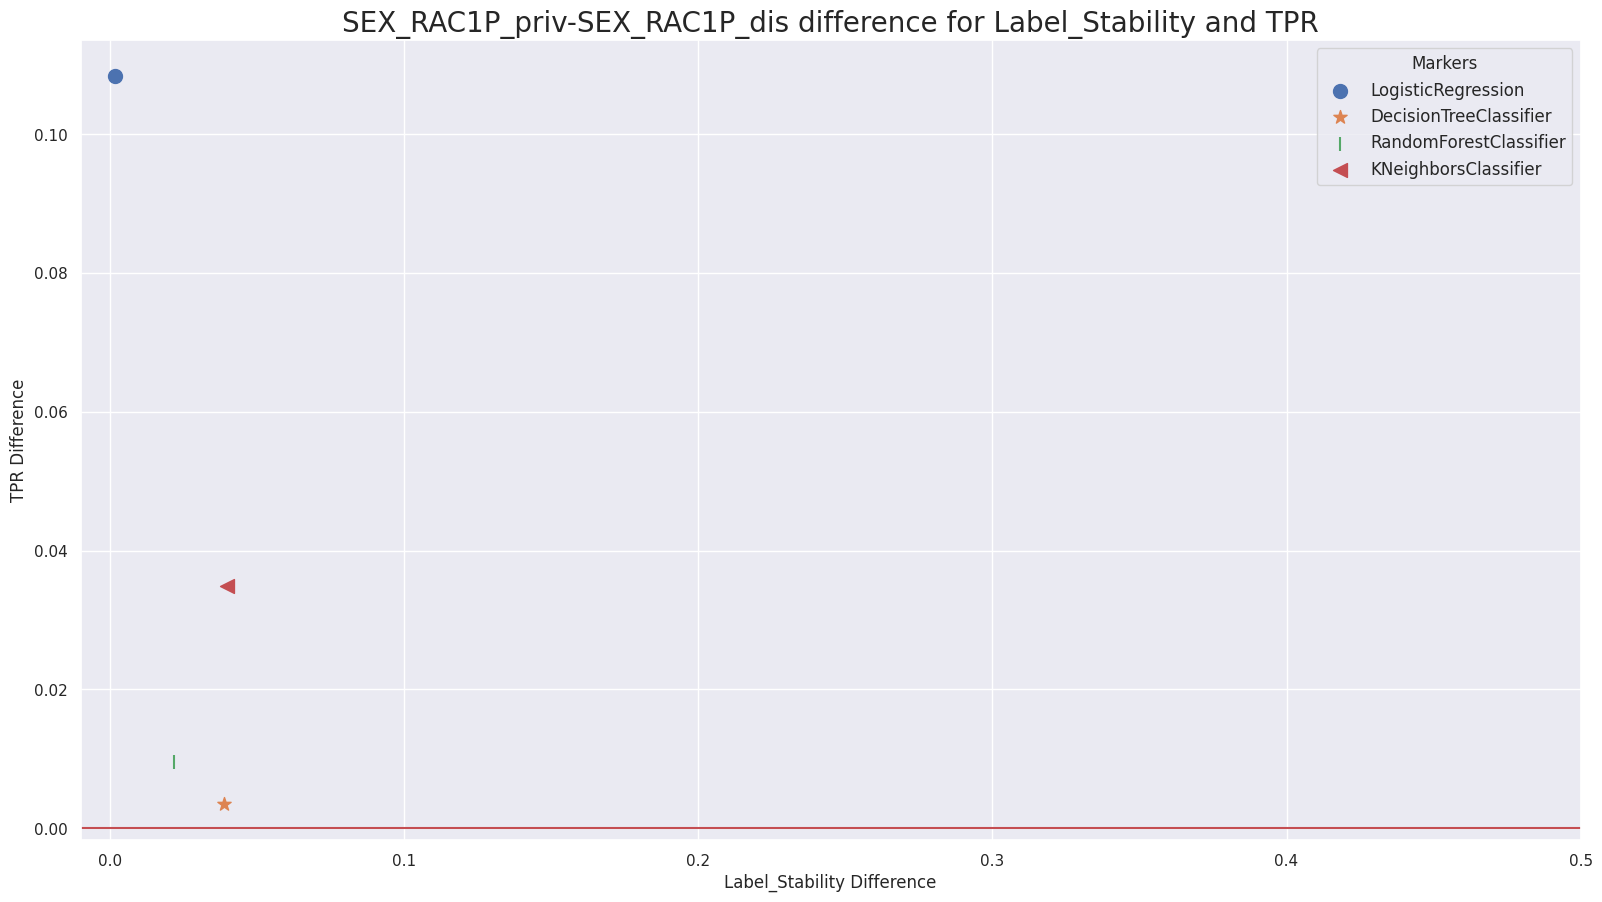

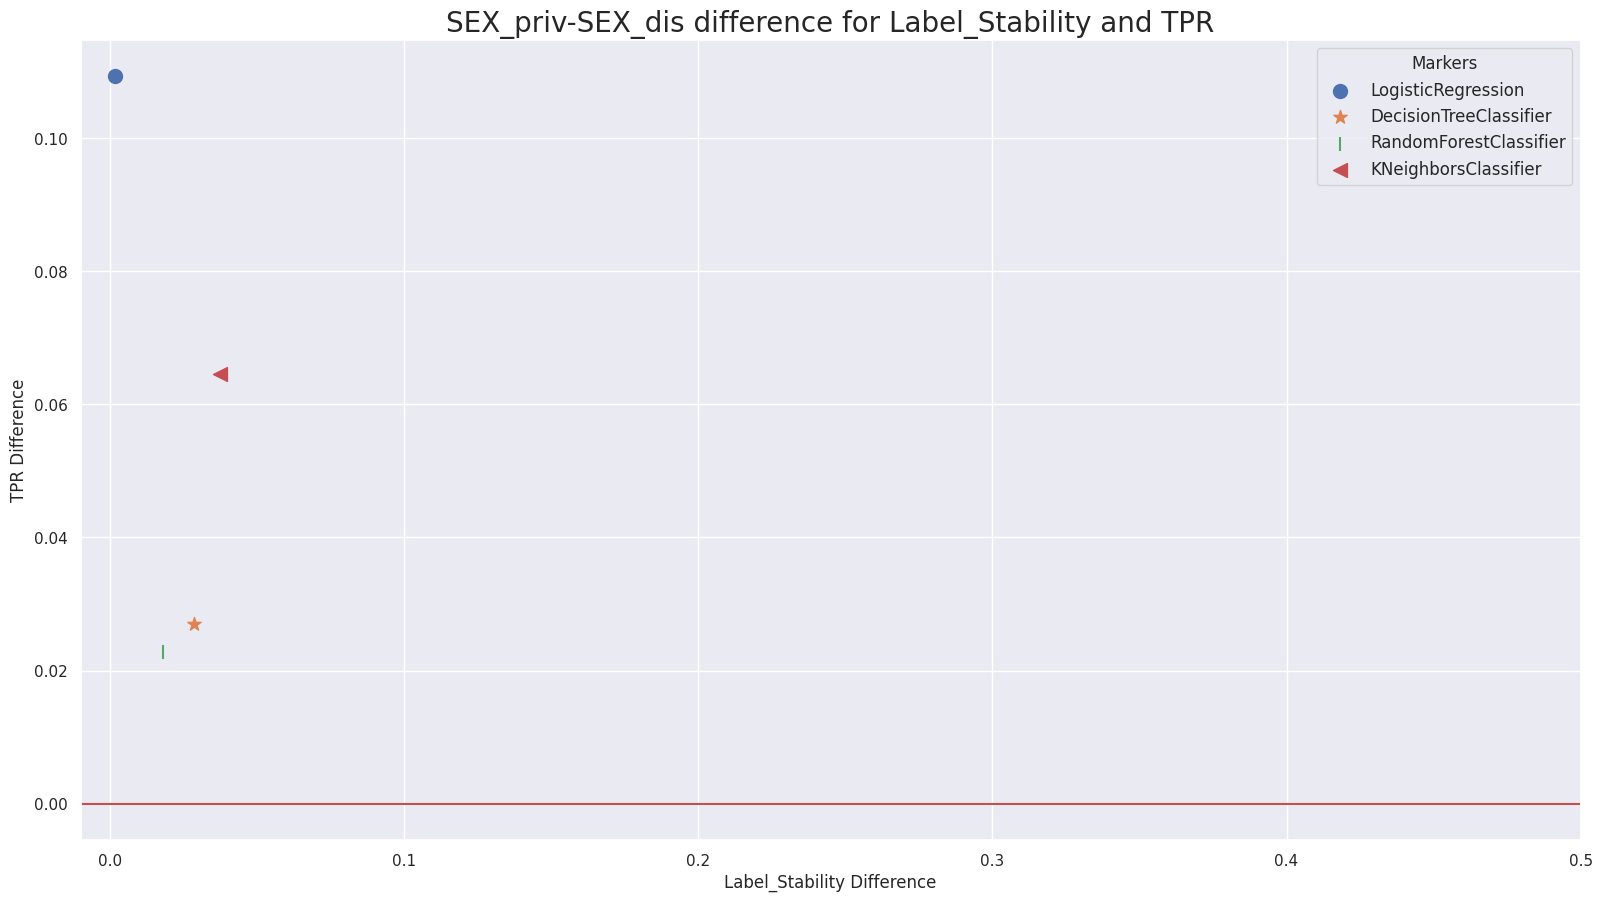

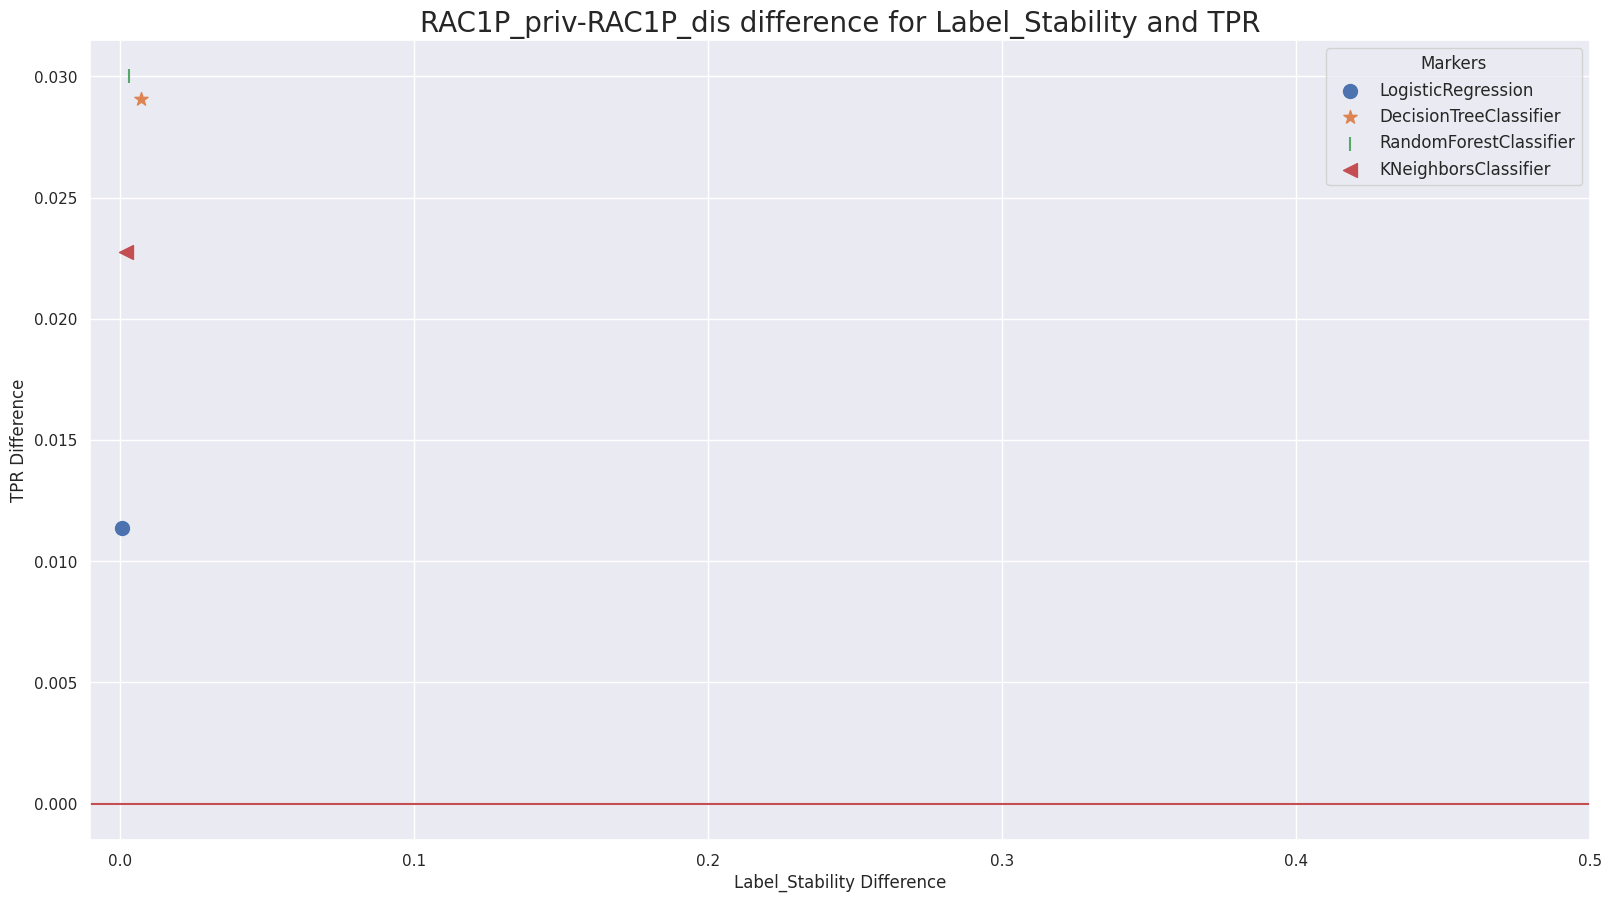

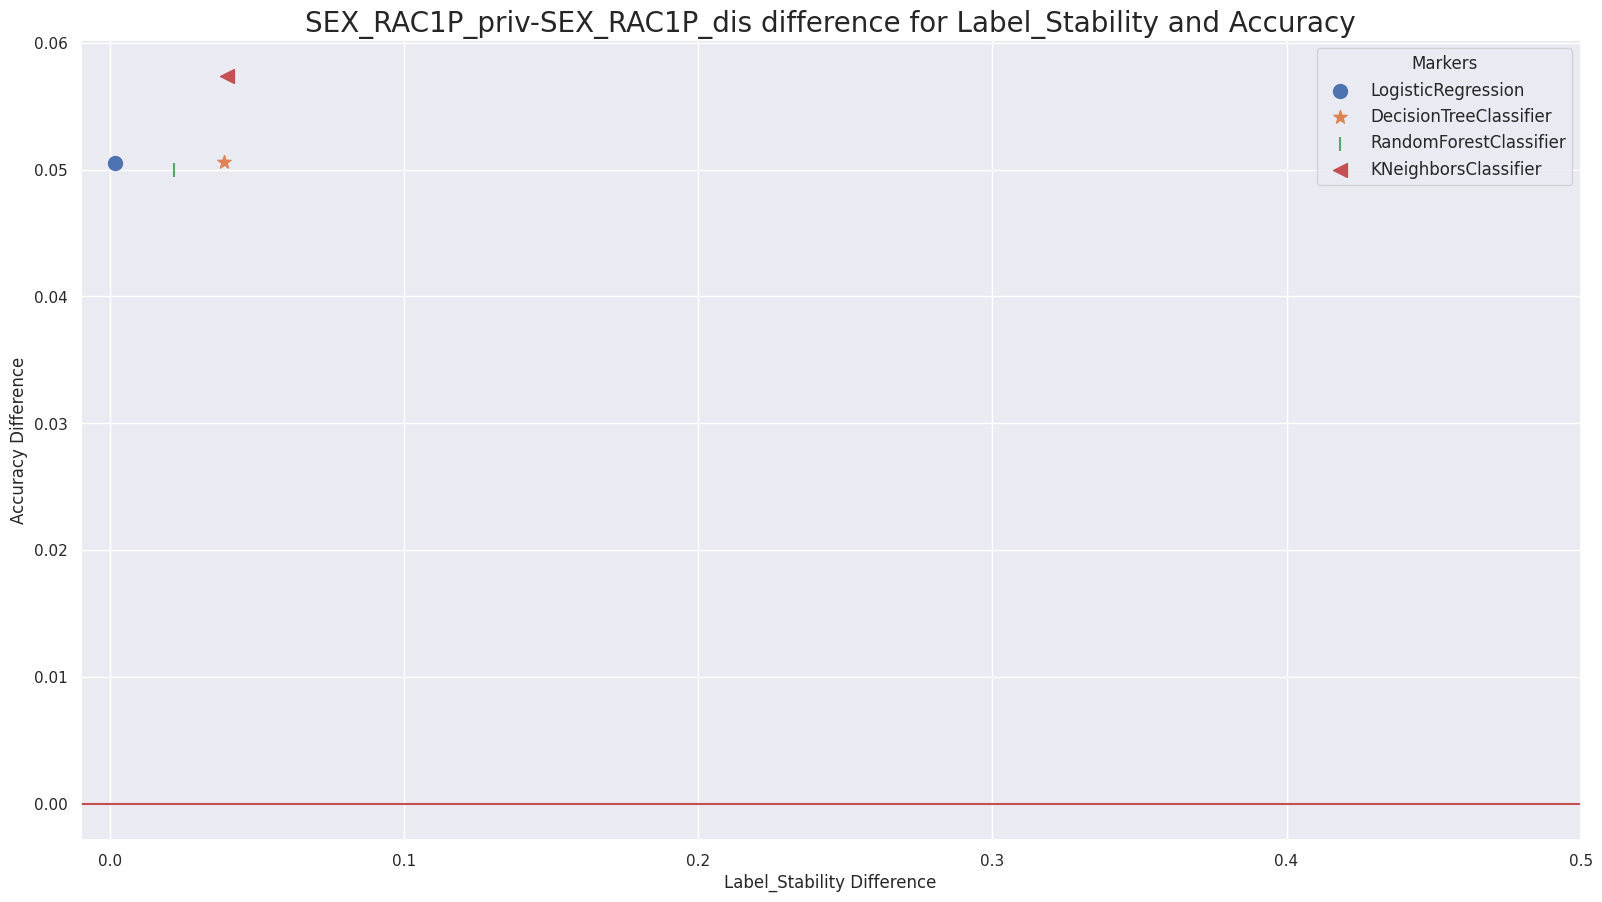

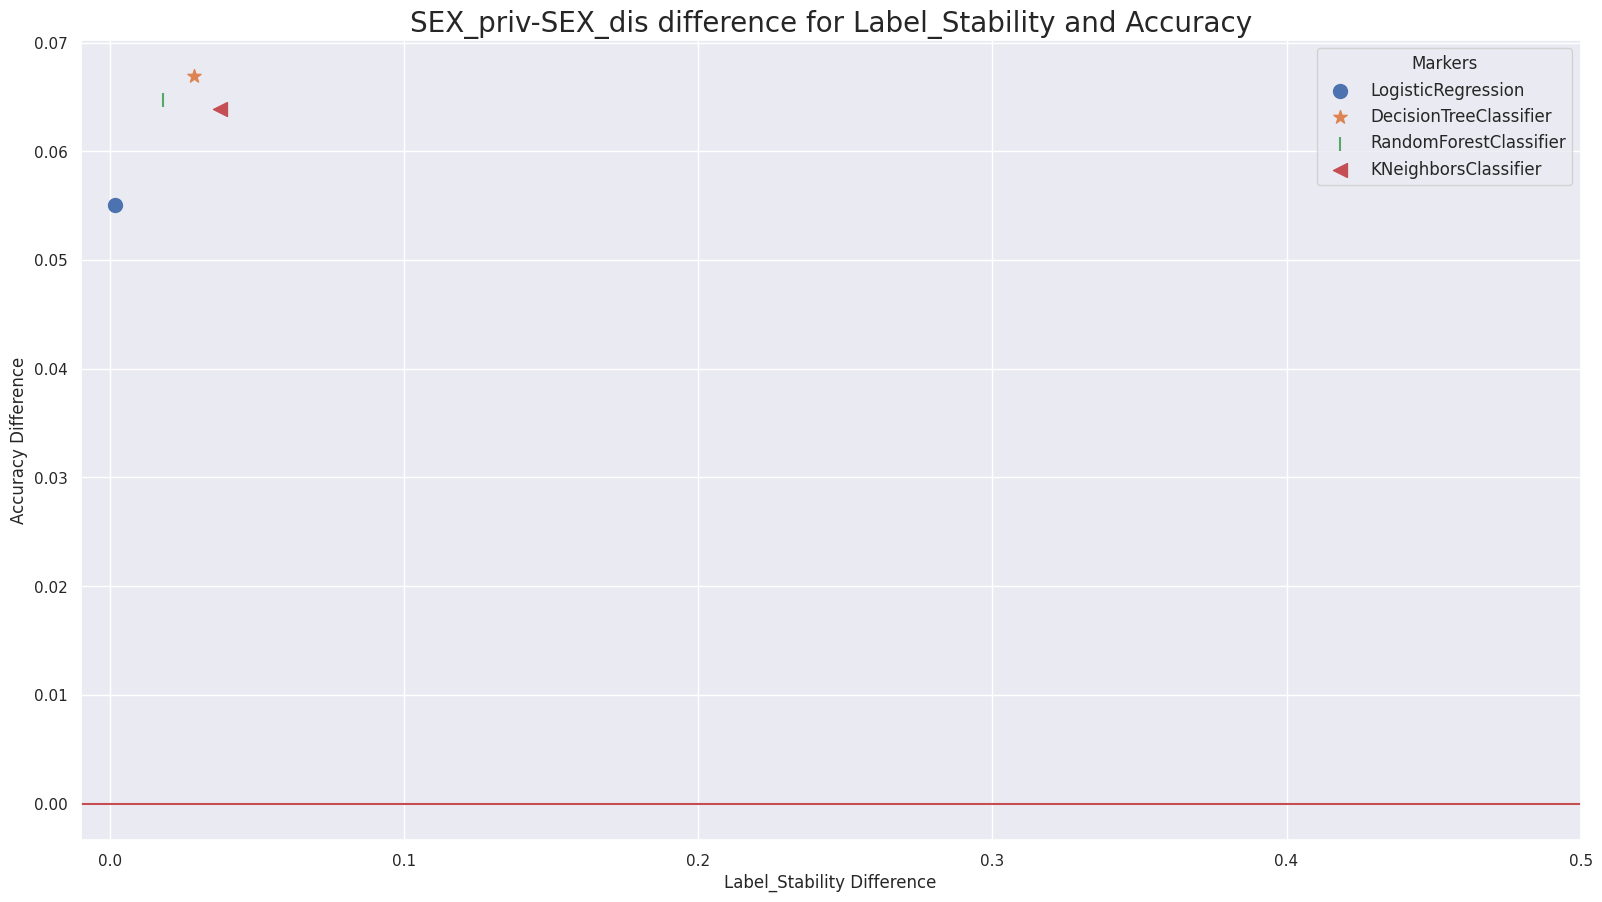

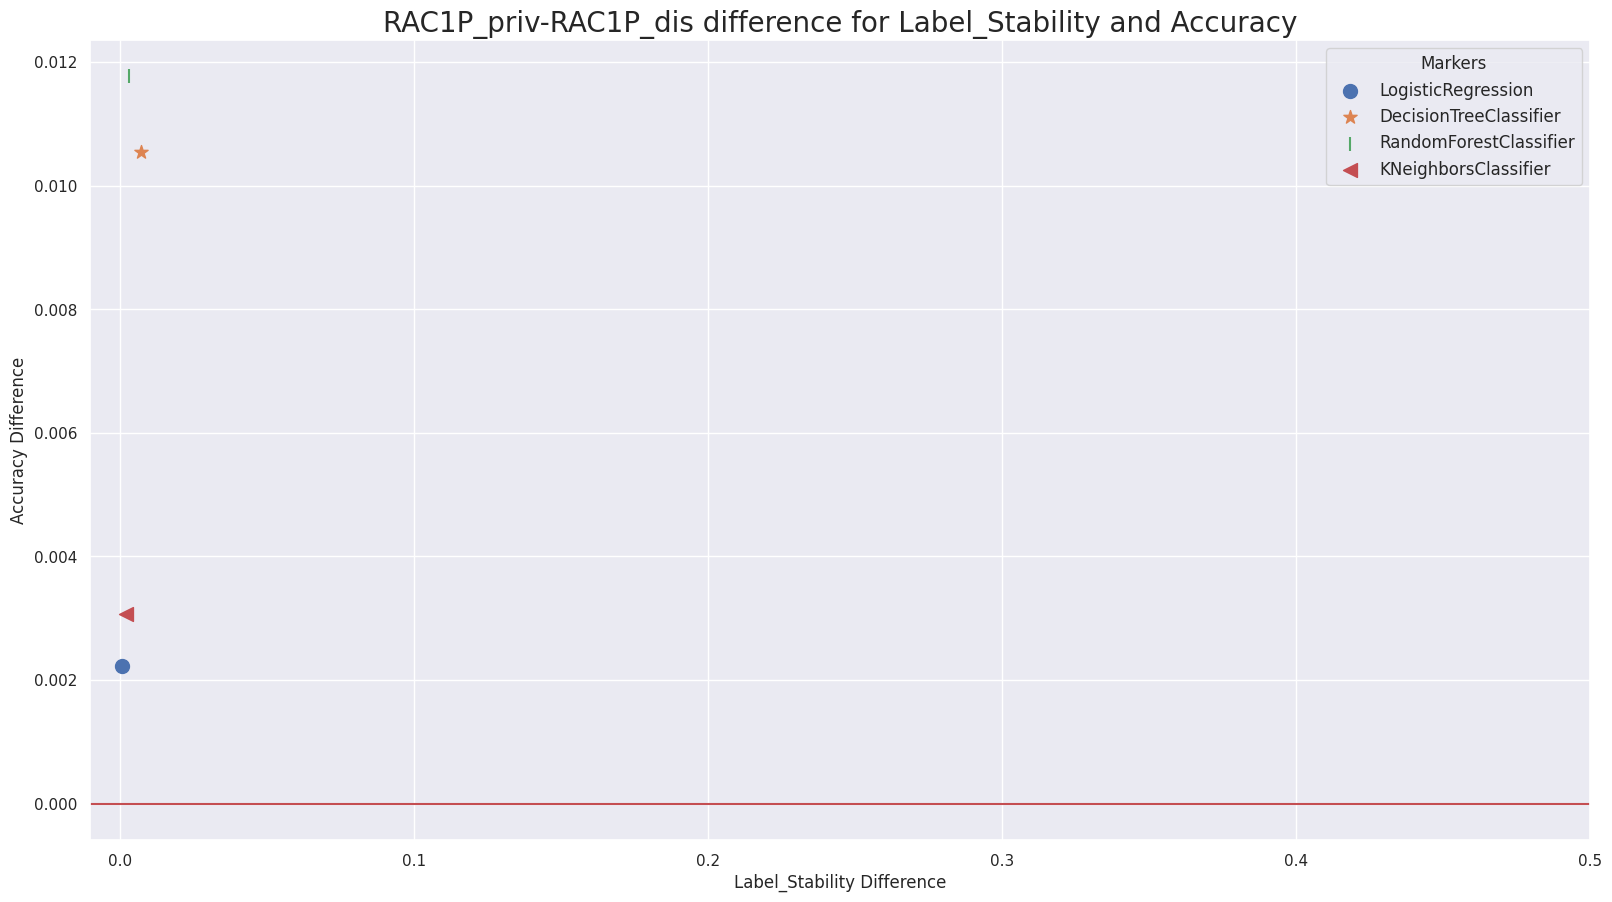

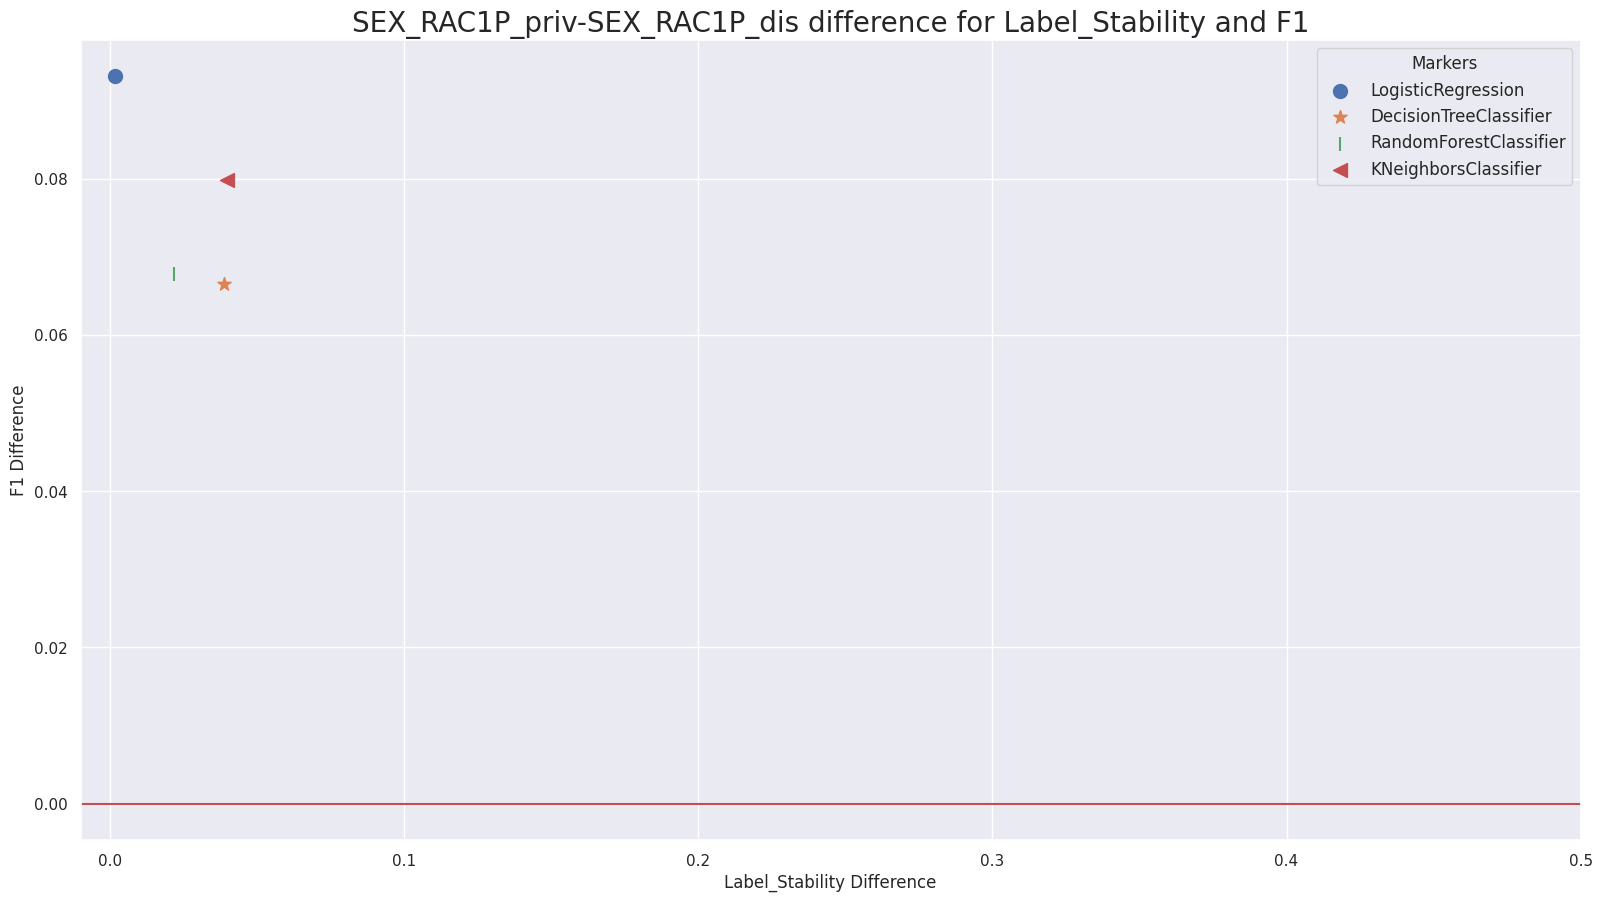

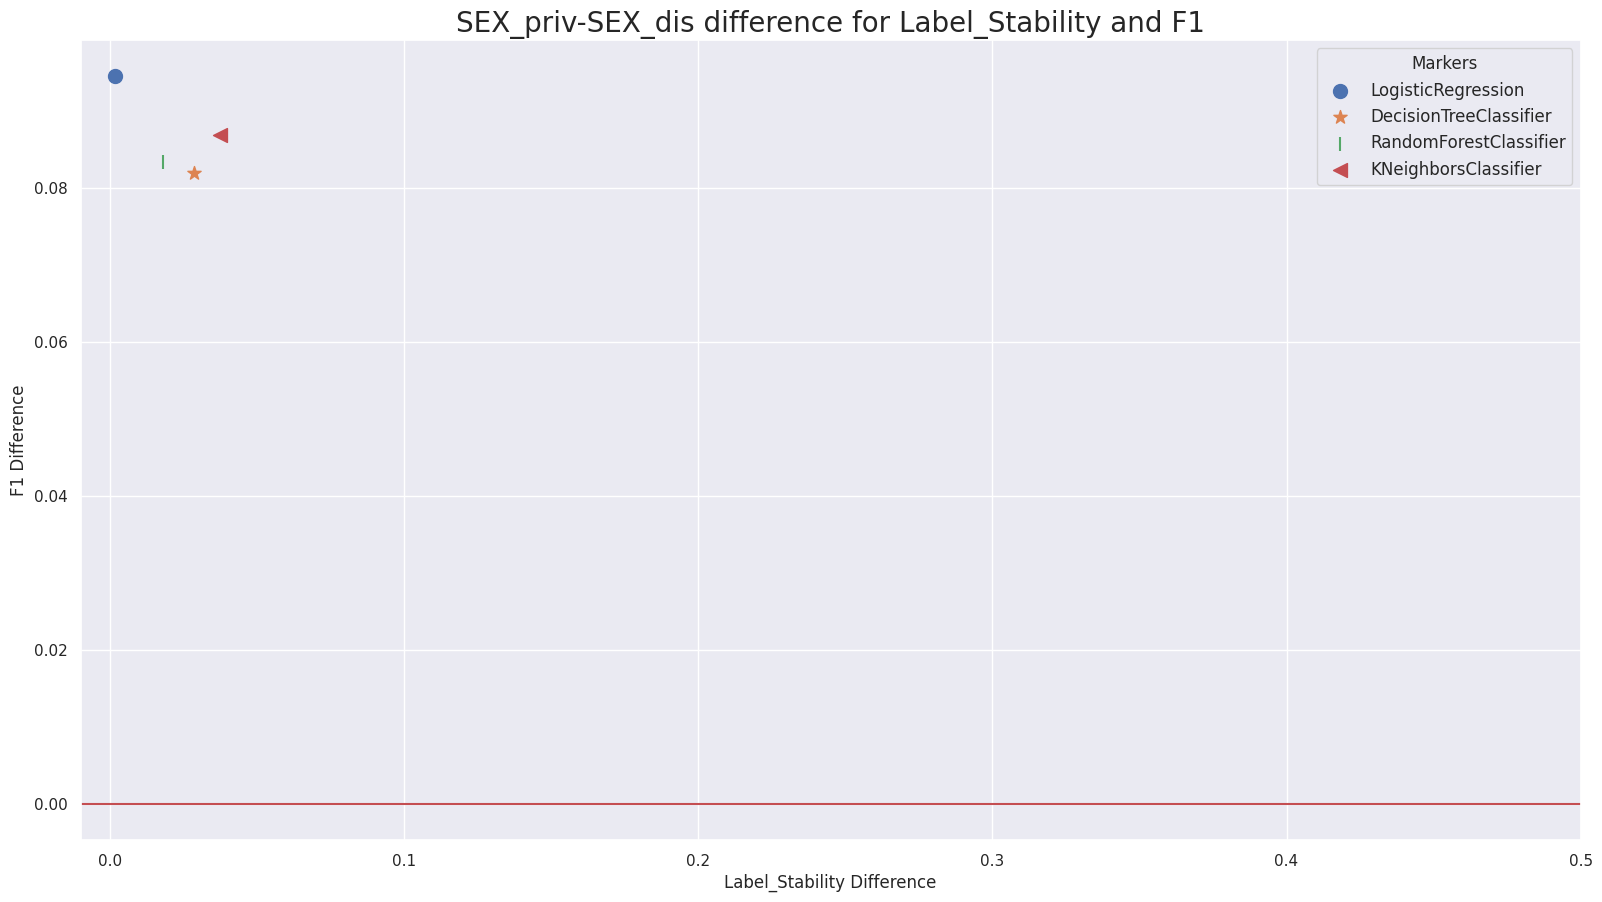

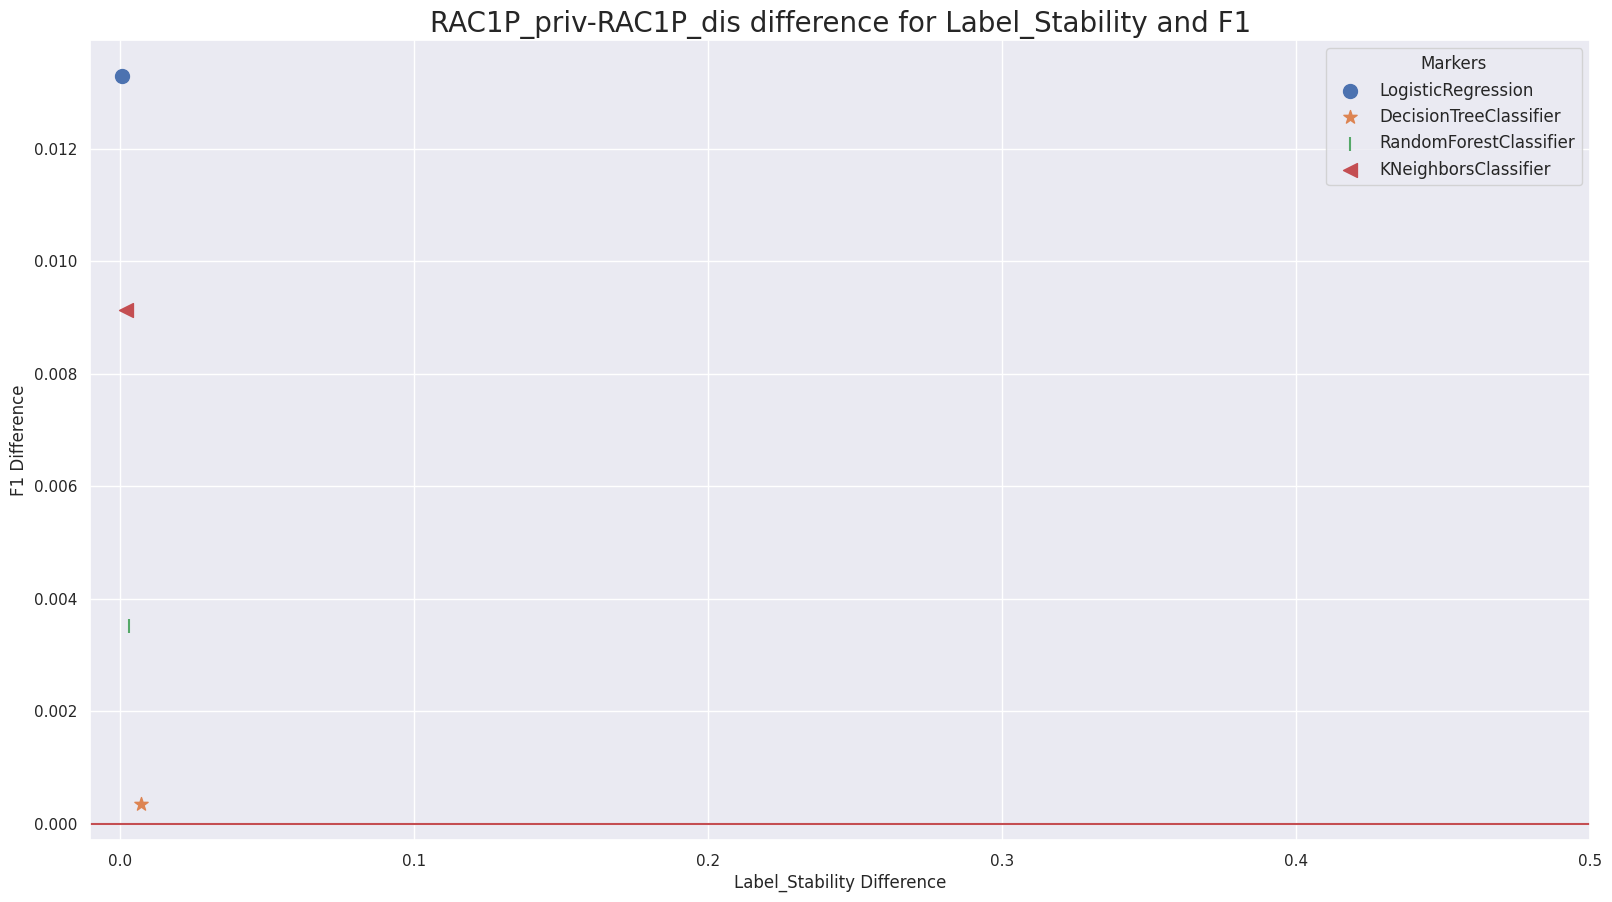

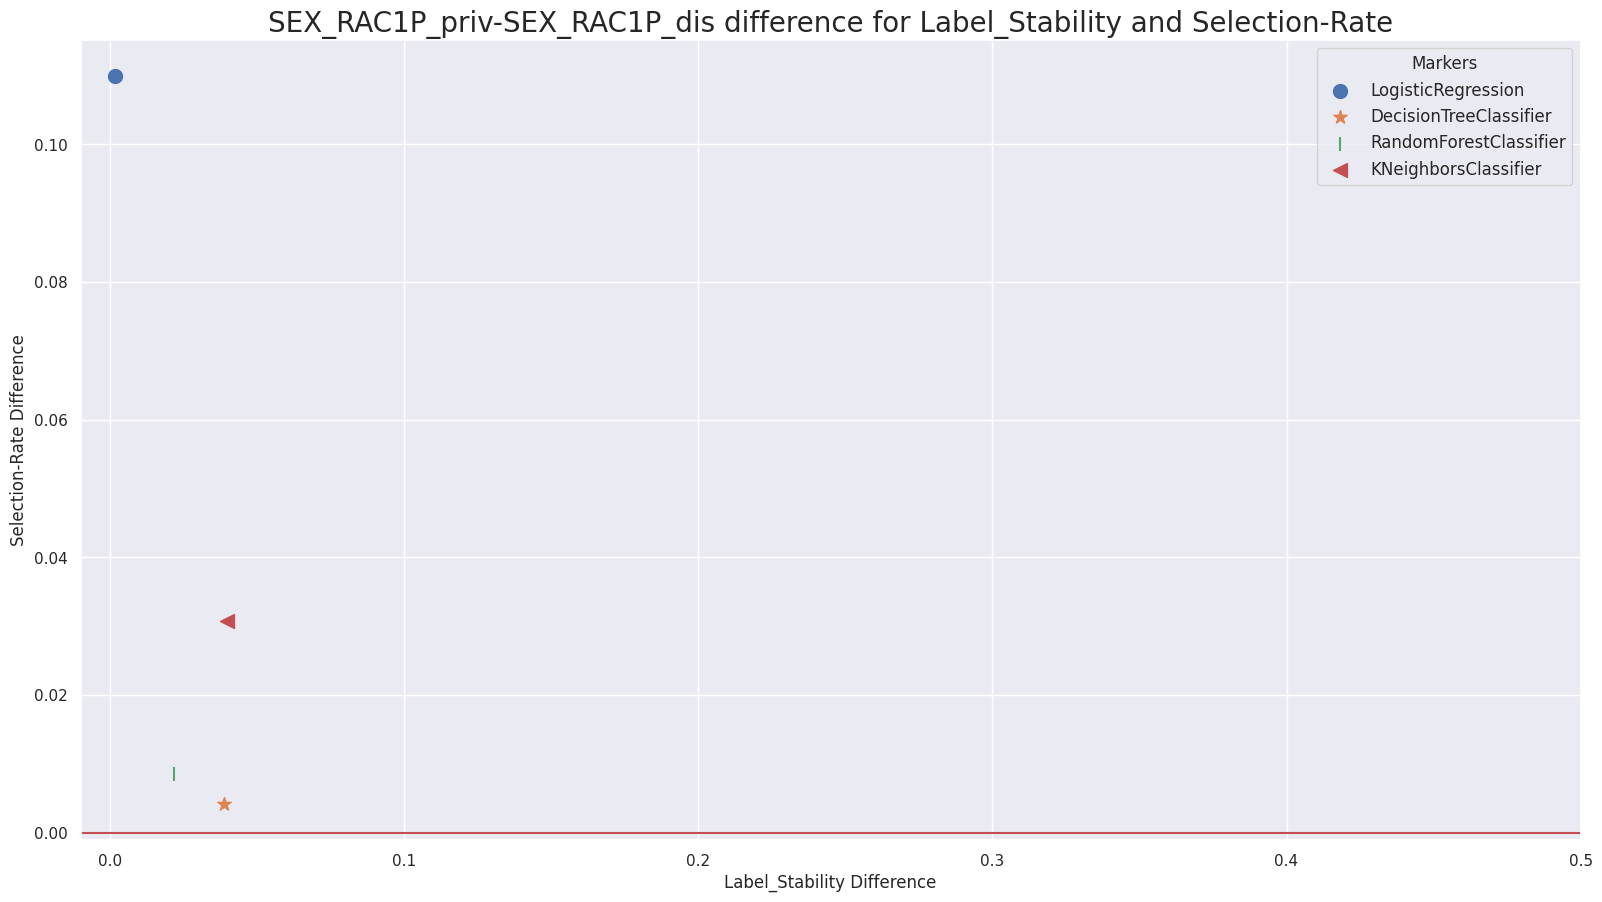

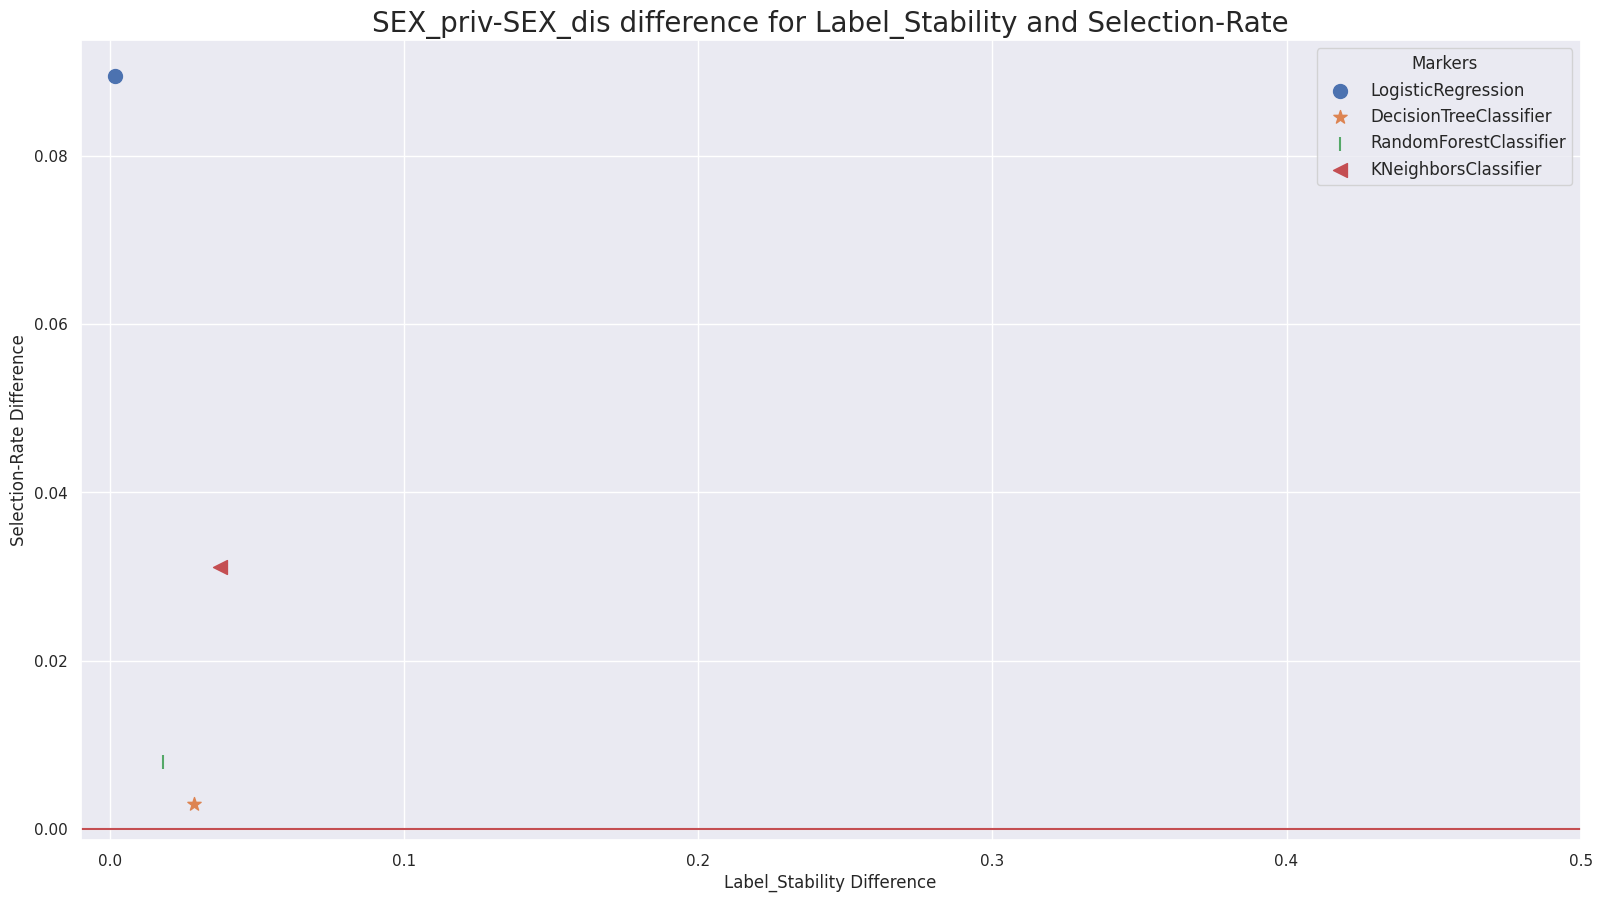

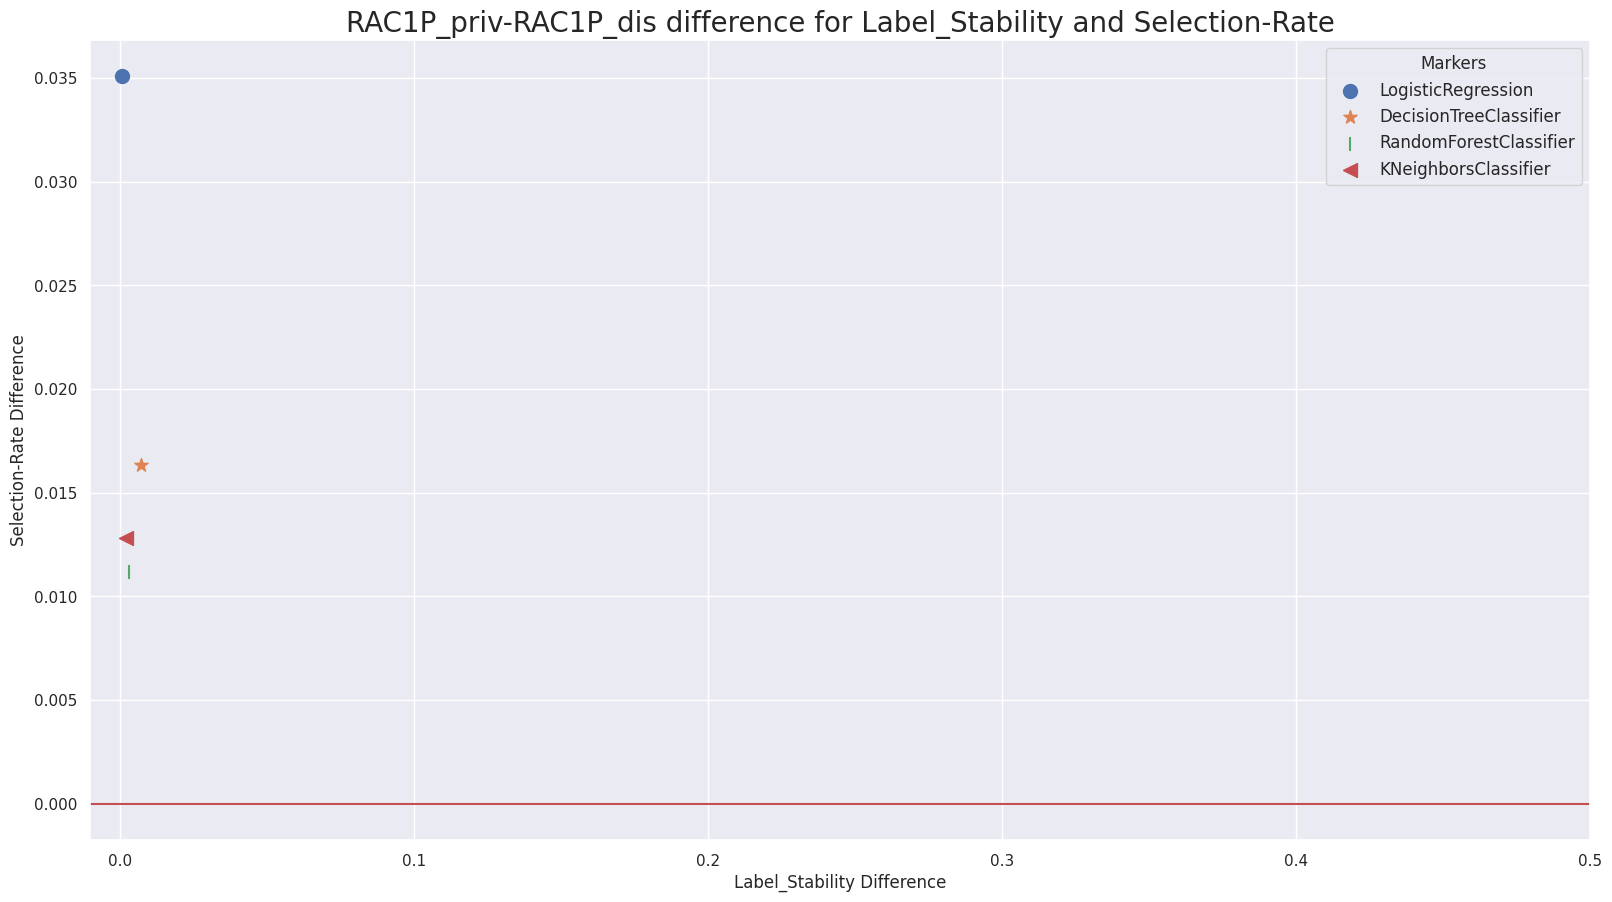

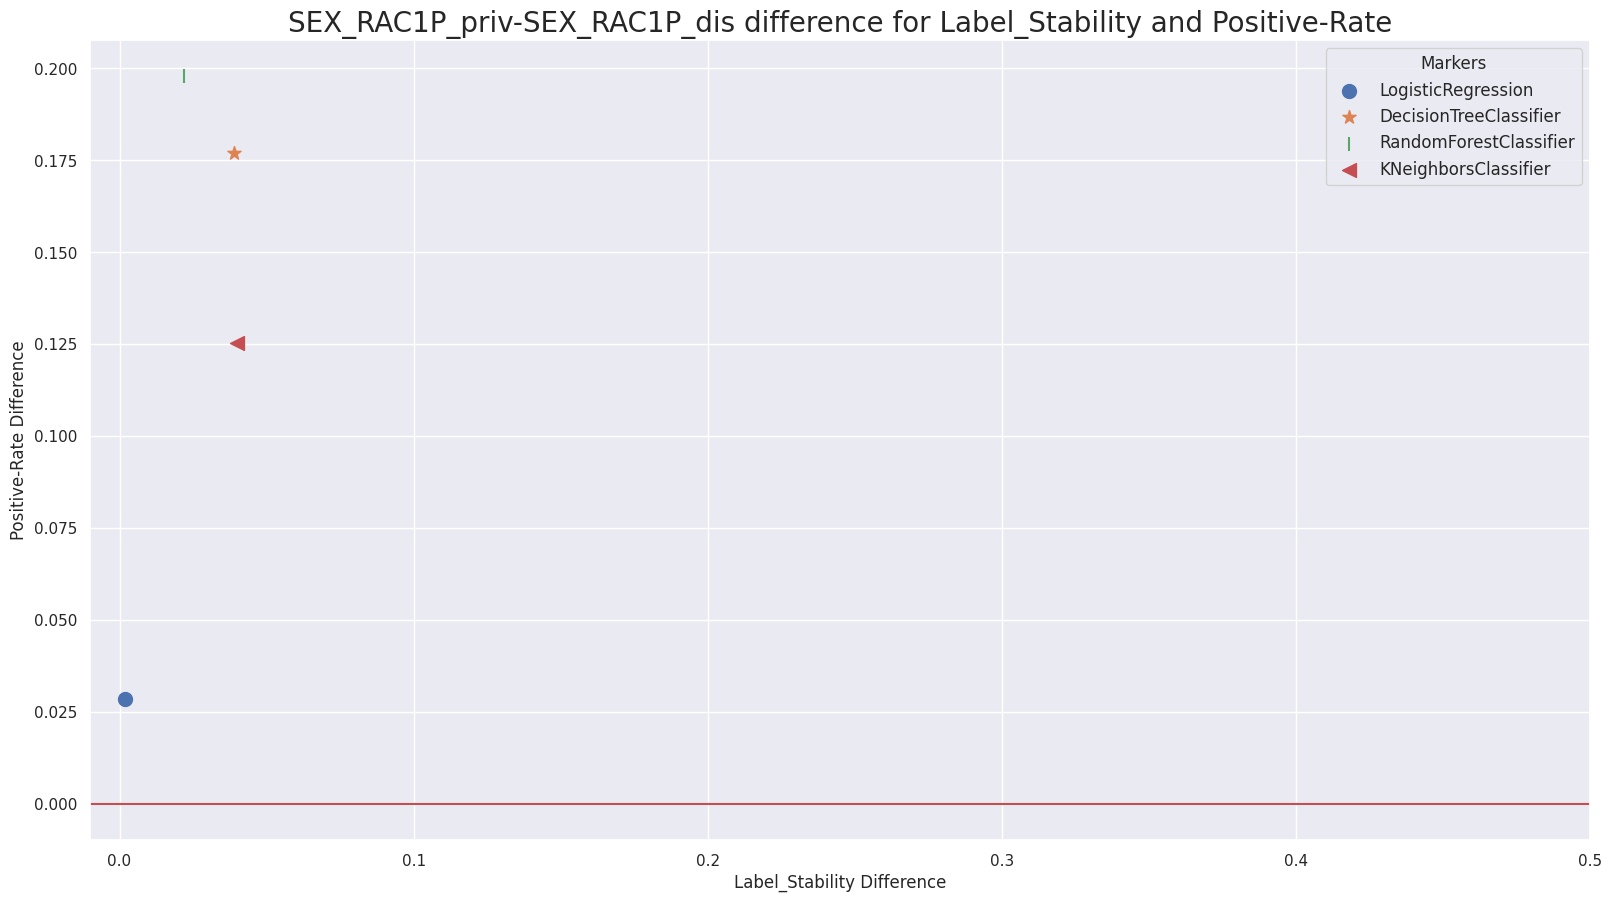

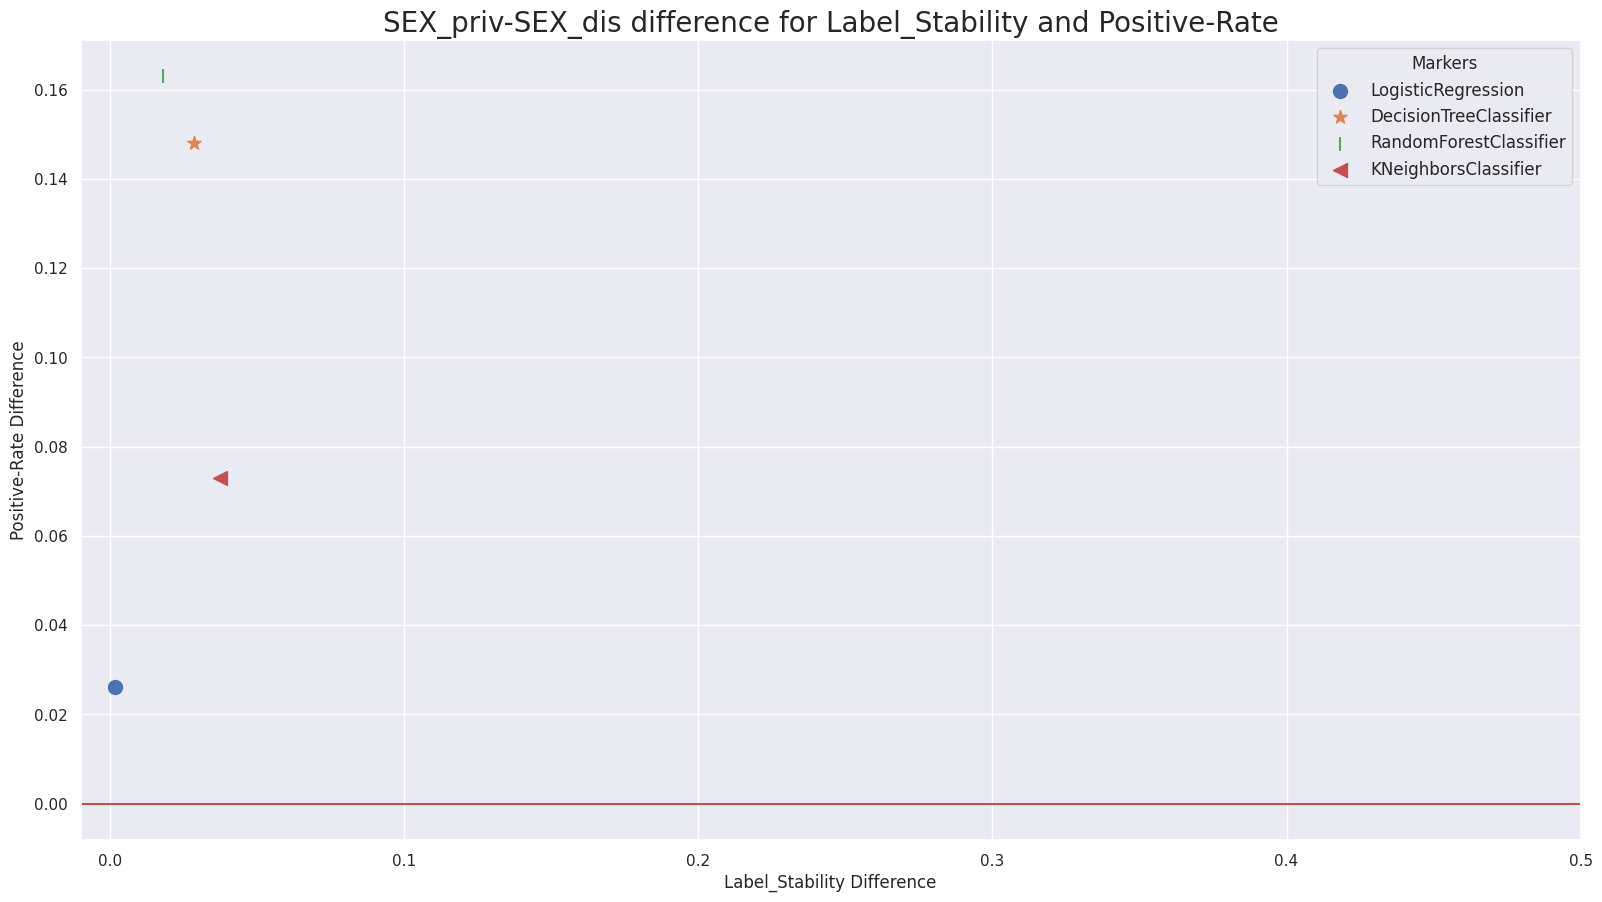

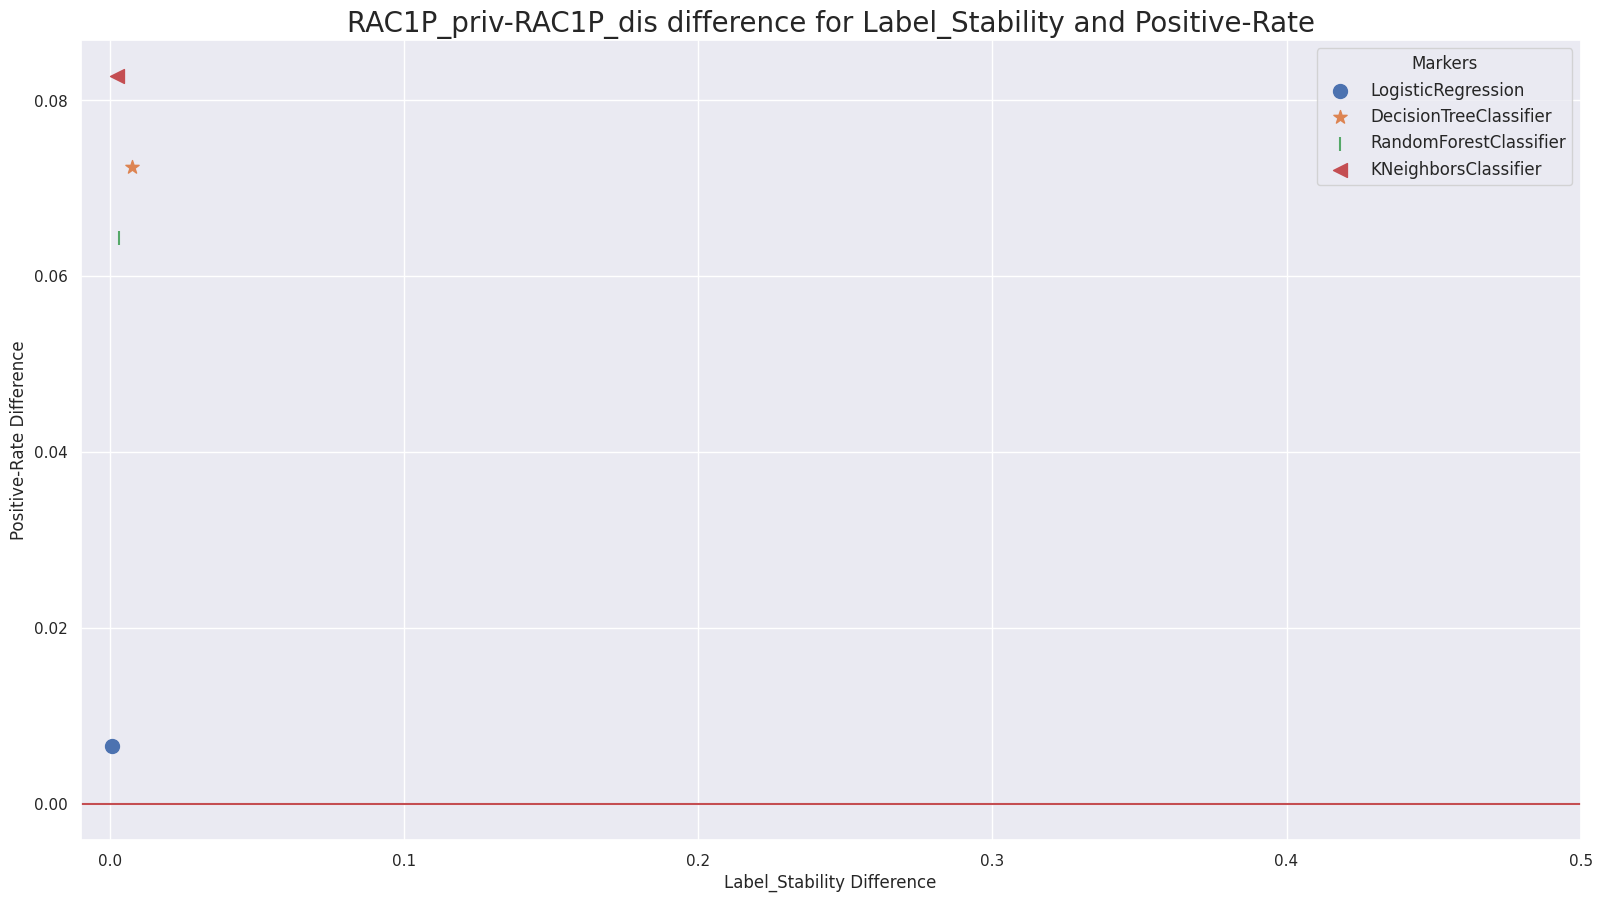

In [68]:
visualize_fairness_metrics_for_prediction_metric(models_average_results_dct,
                                                 x_metric='Label_Stability',
                                                 y_metrics=['TPR', 'Accuracy', 'F1', 'Selection-Rate', 'Positive-Rate'])

### Jitter

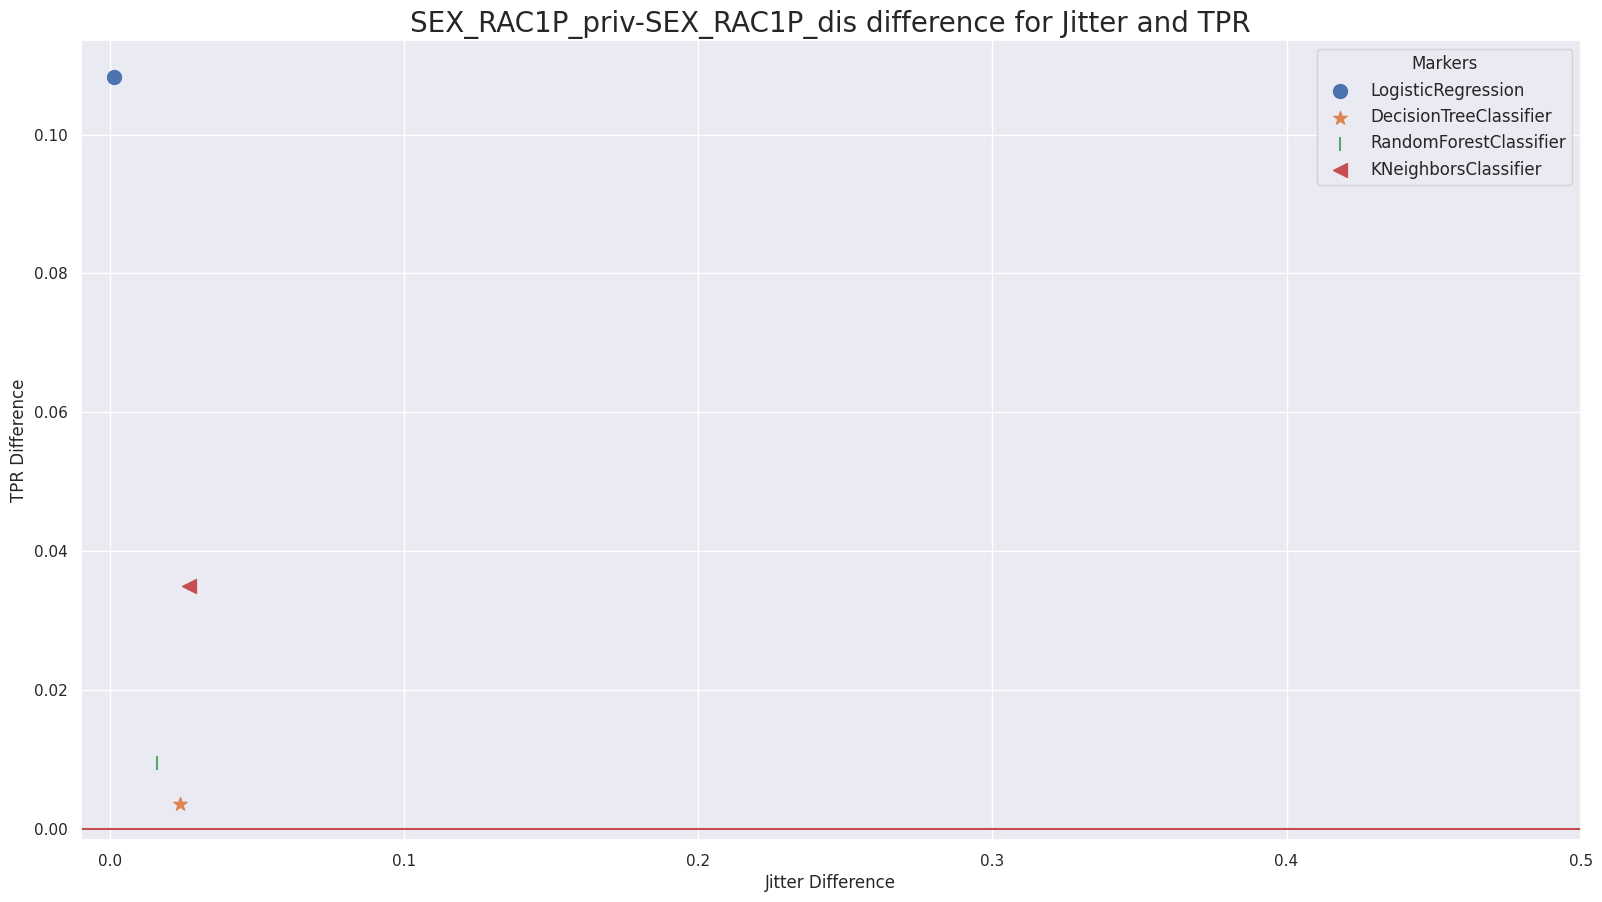

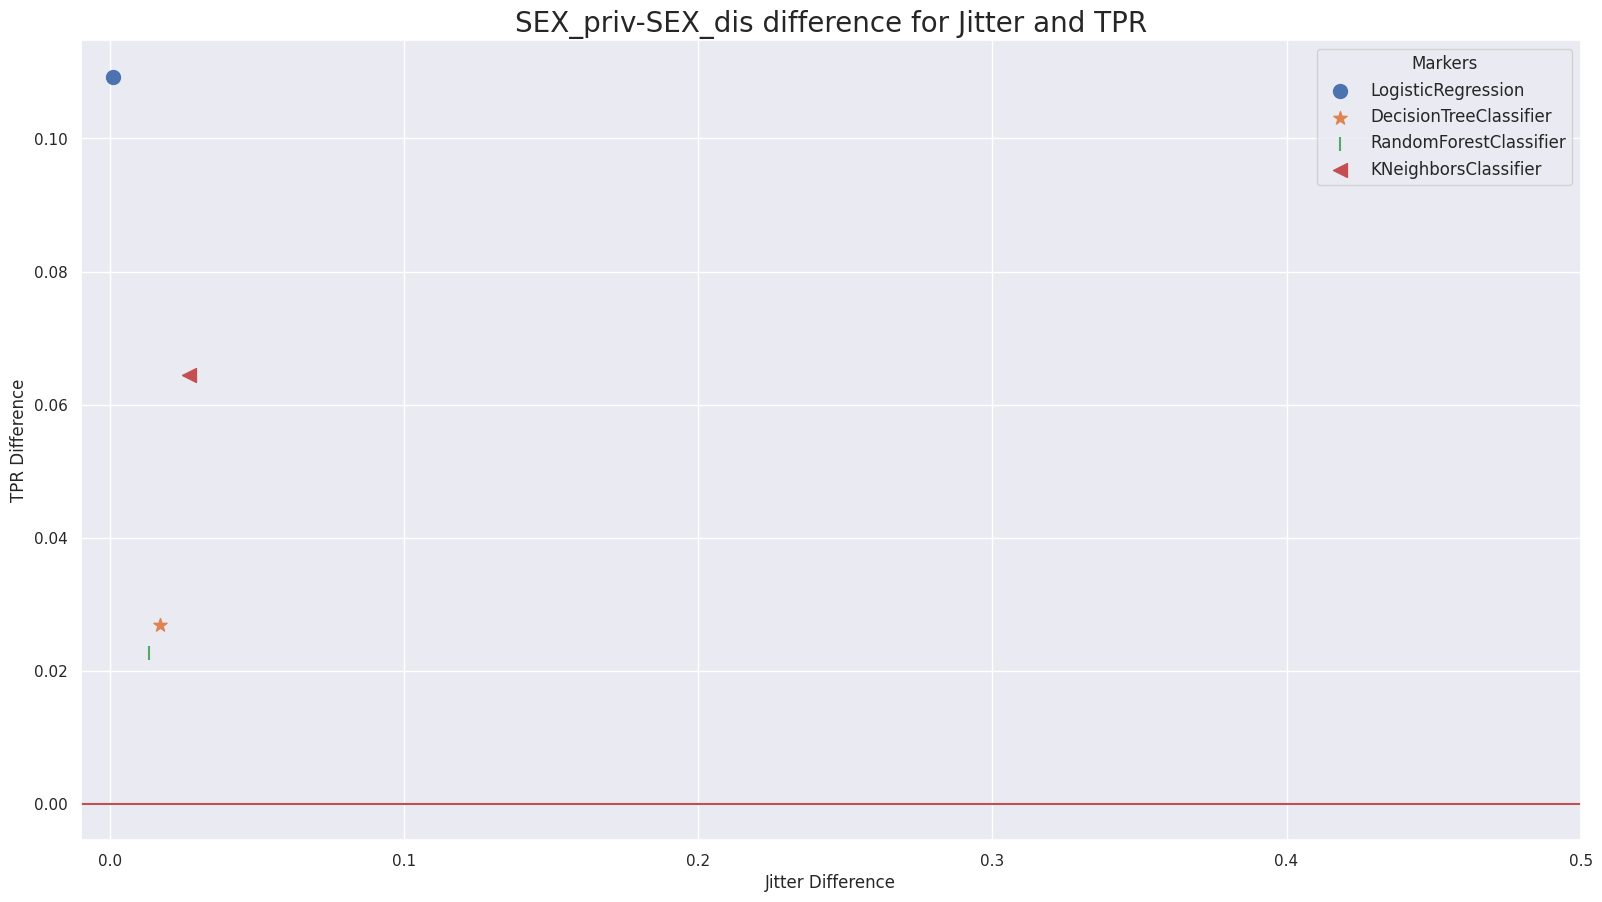

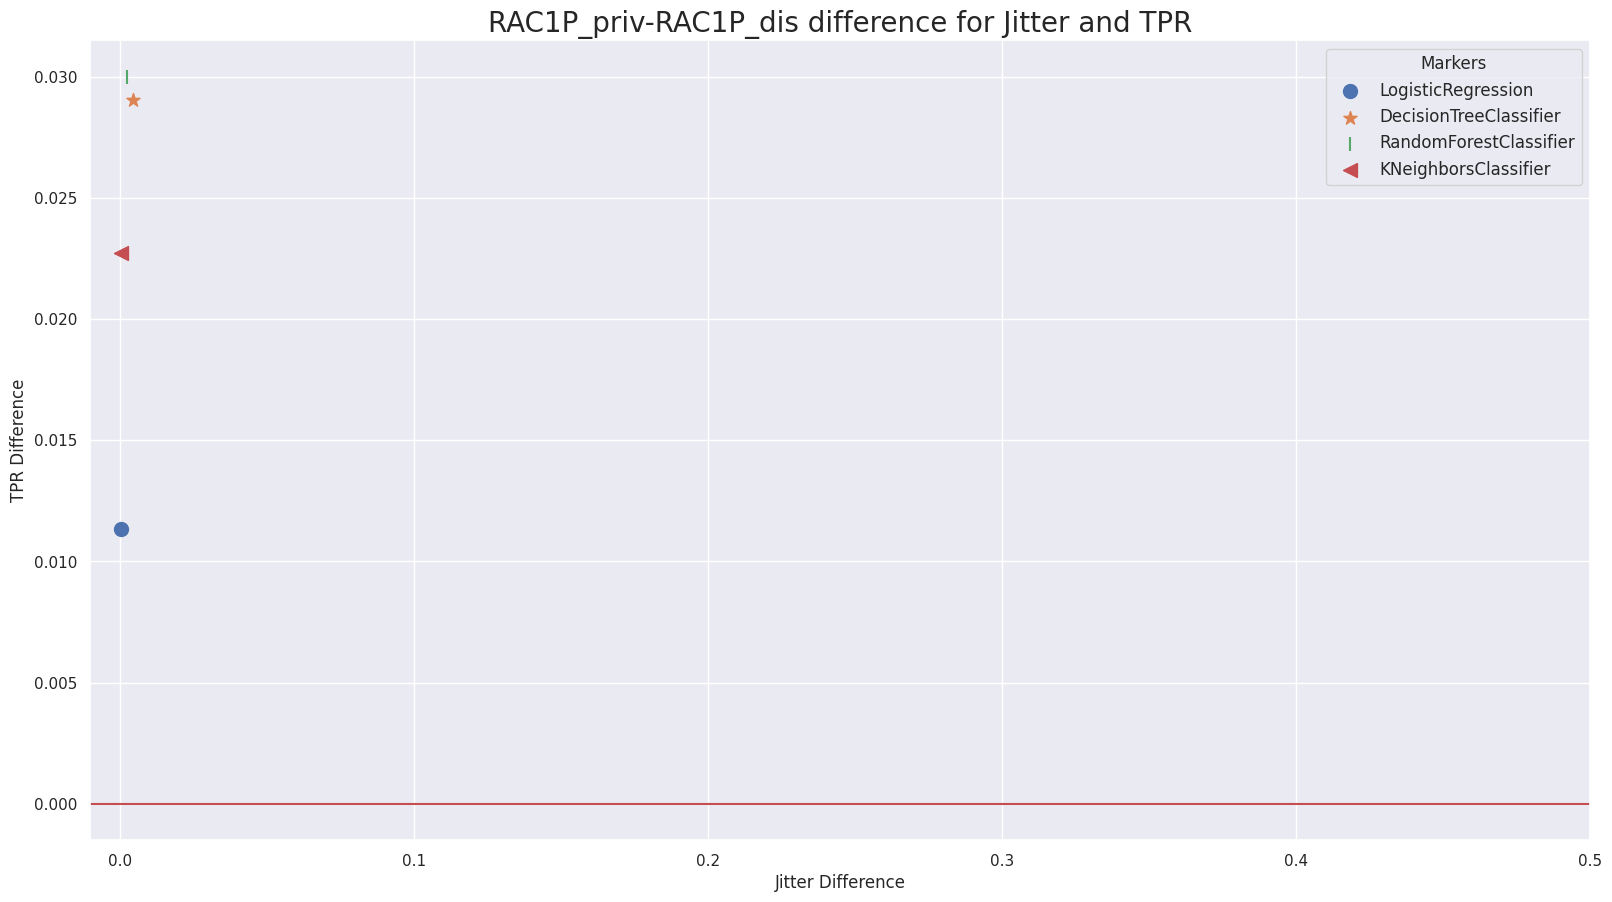

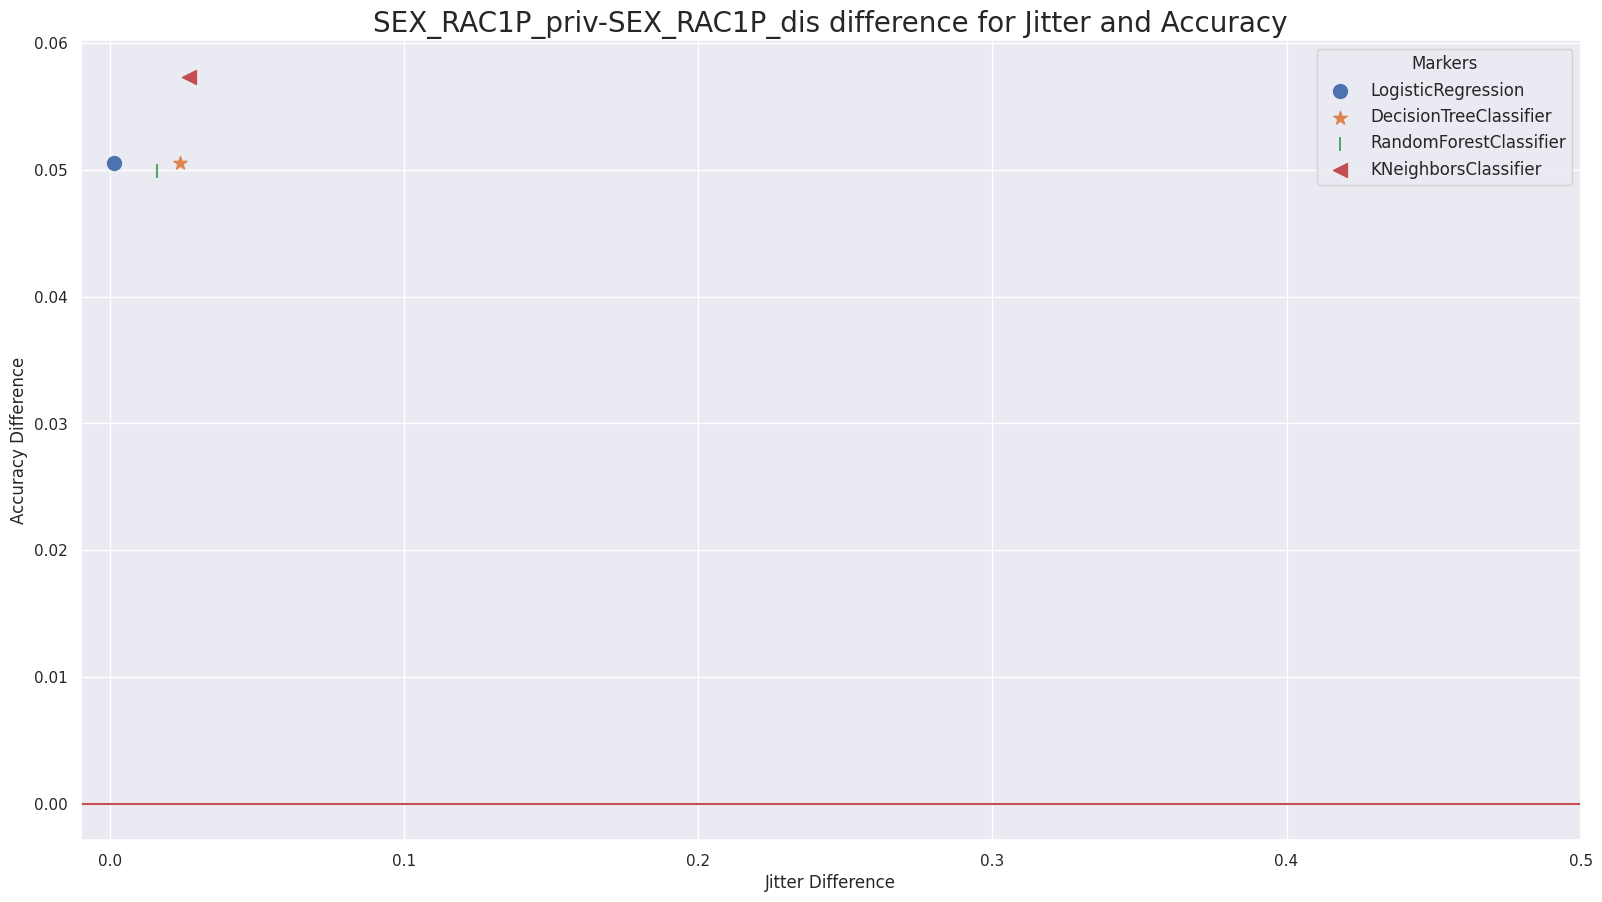

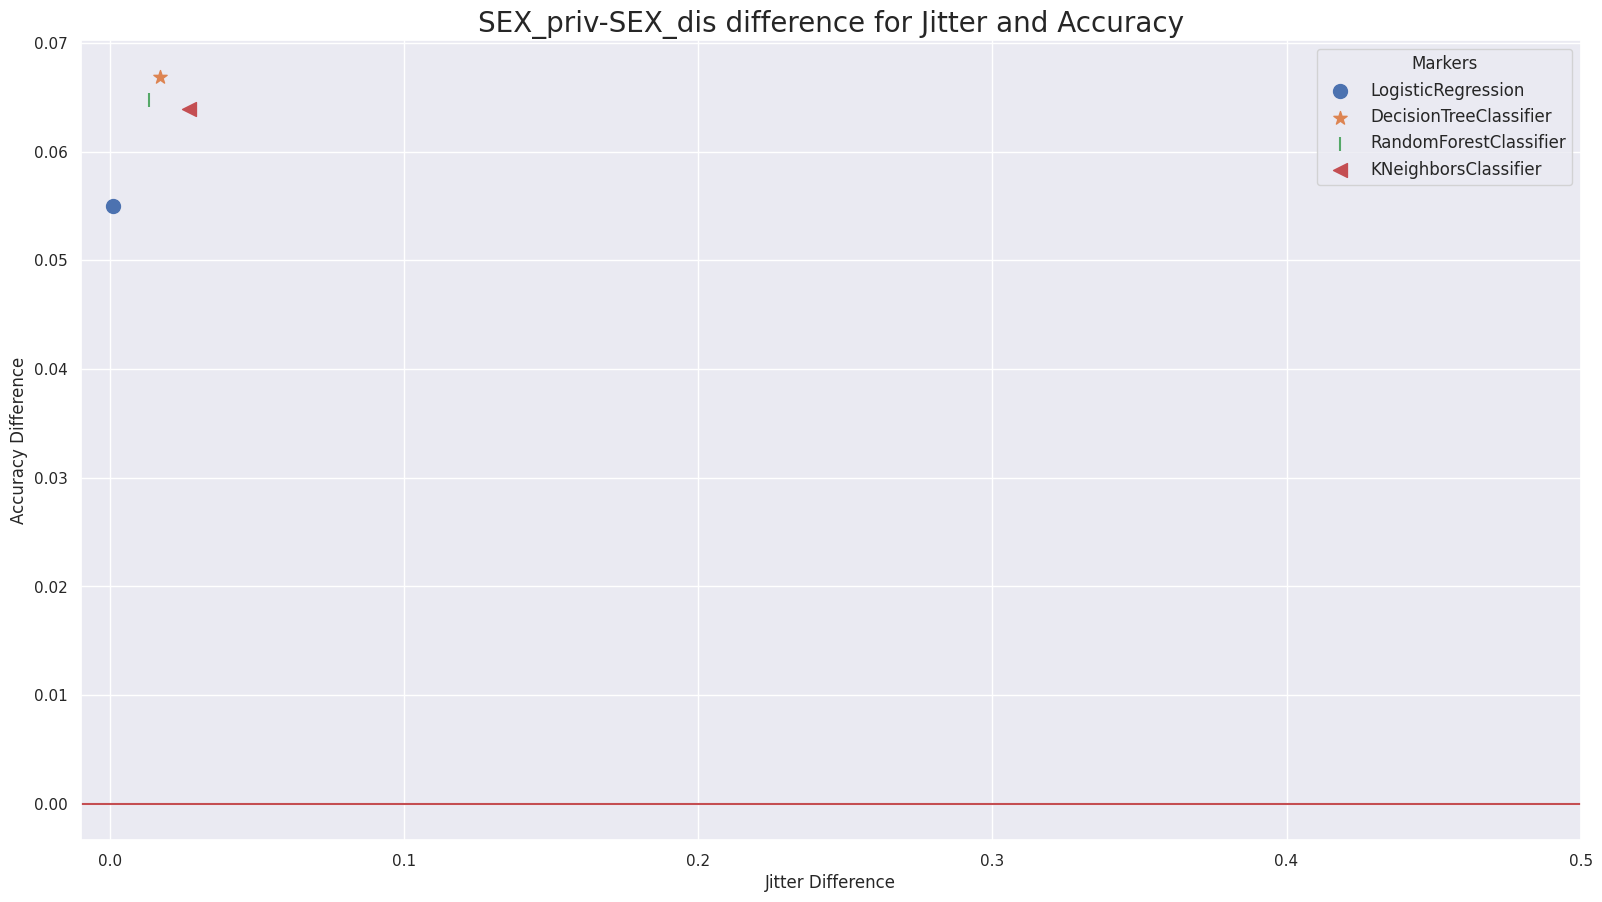

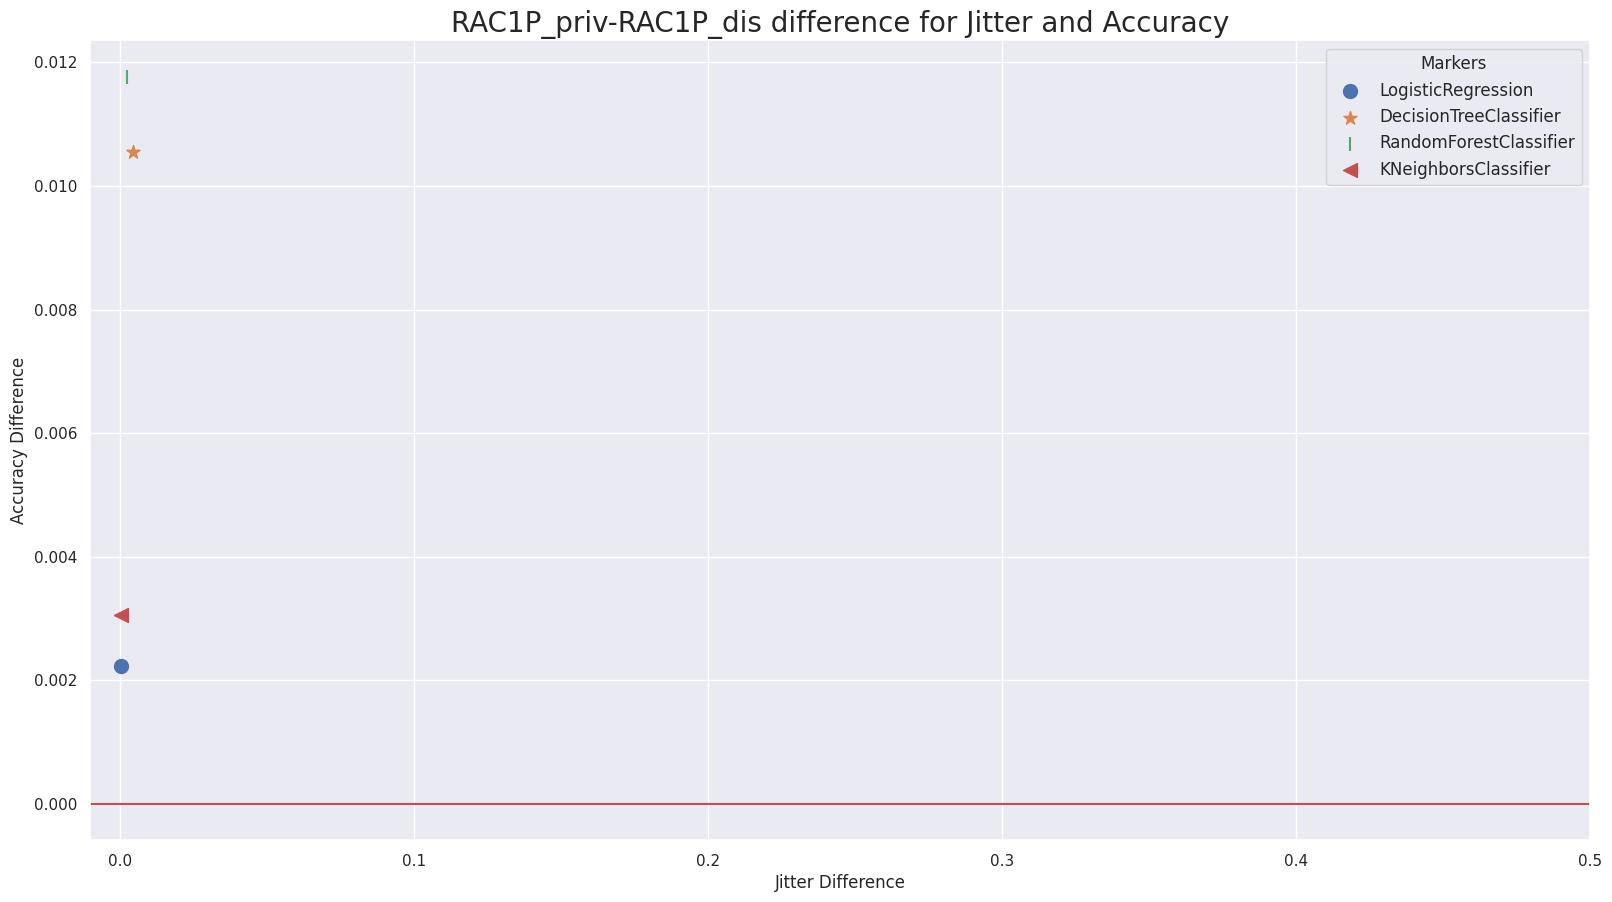

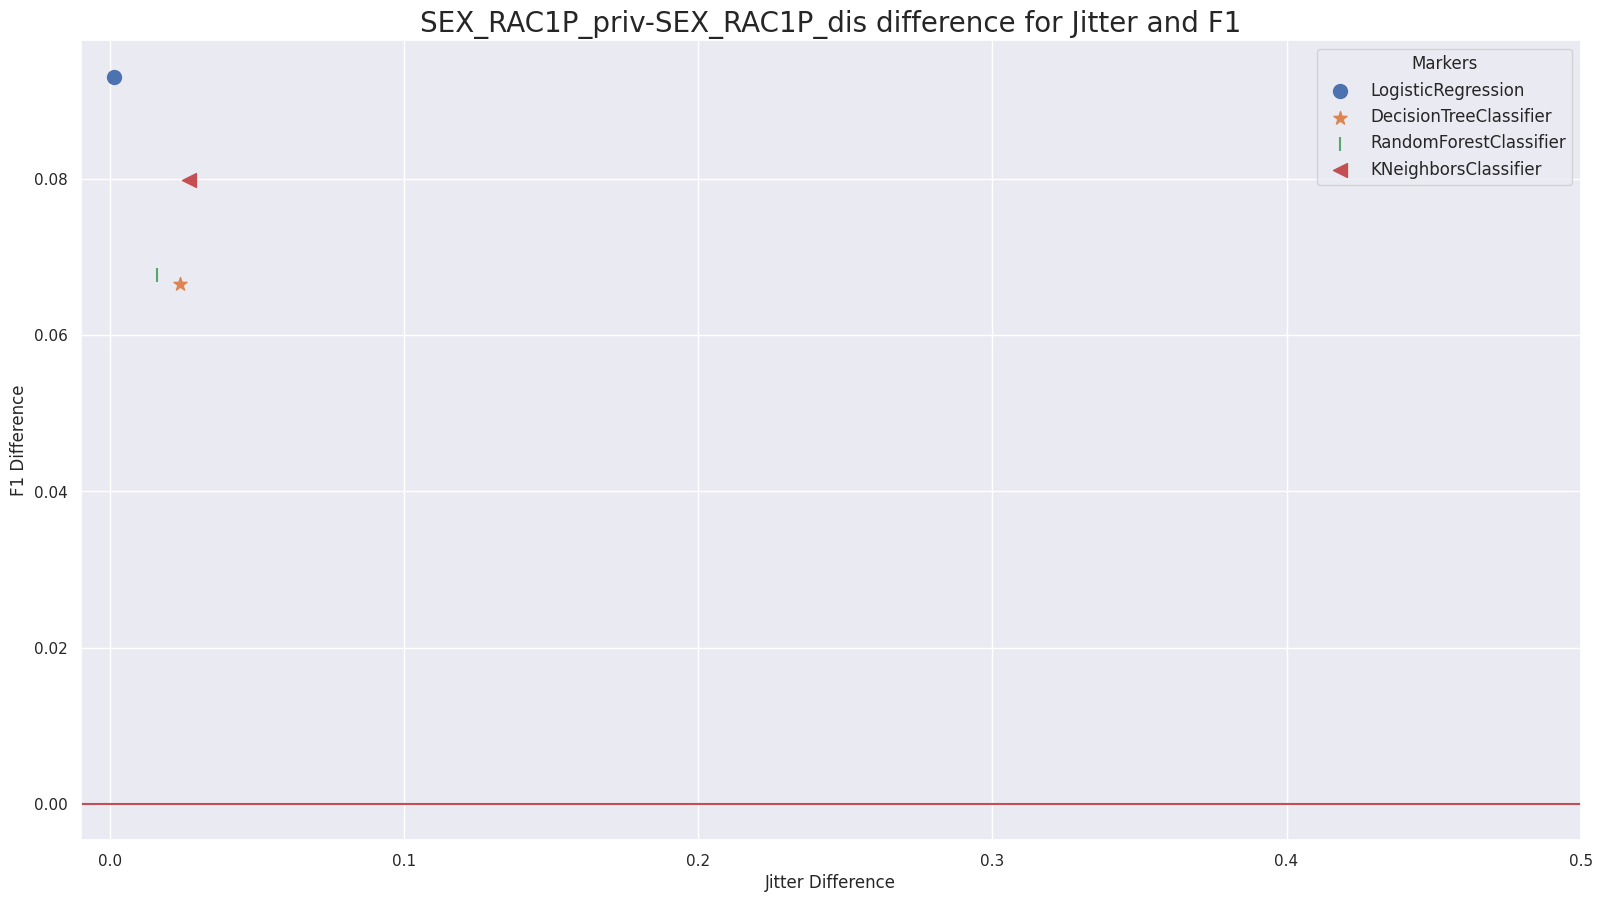

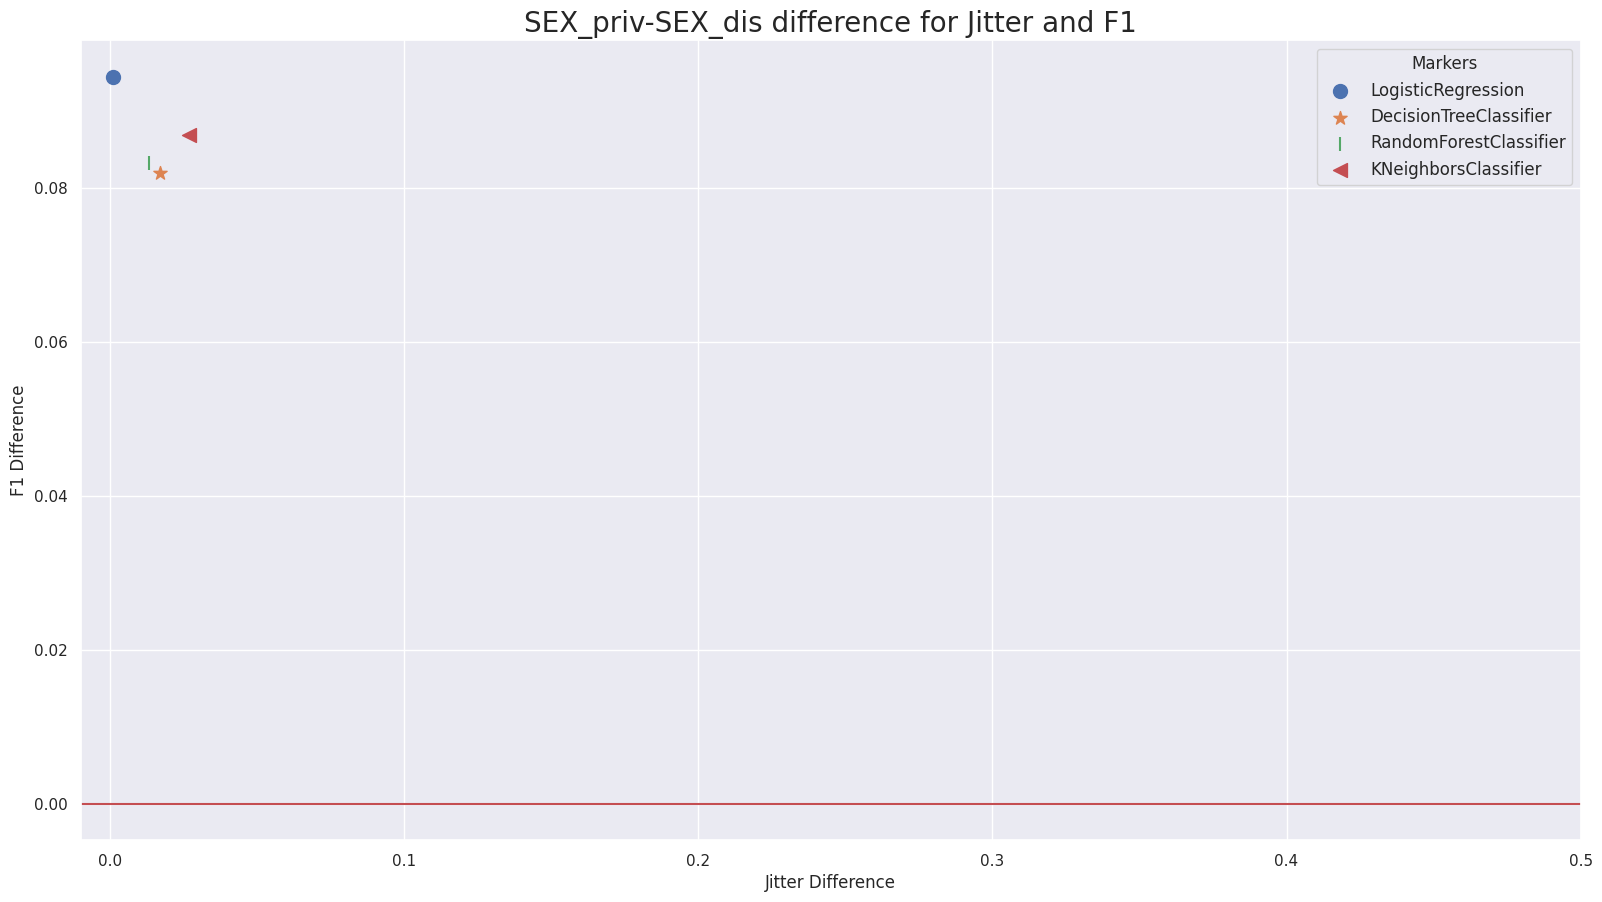

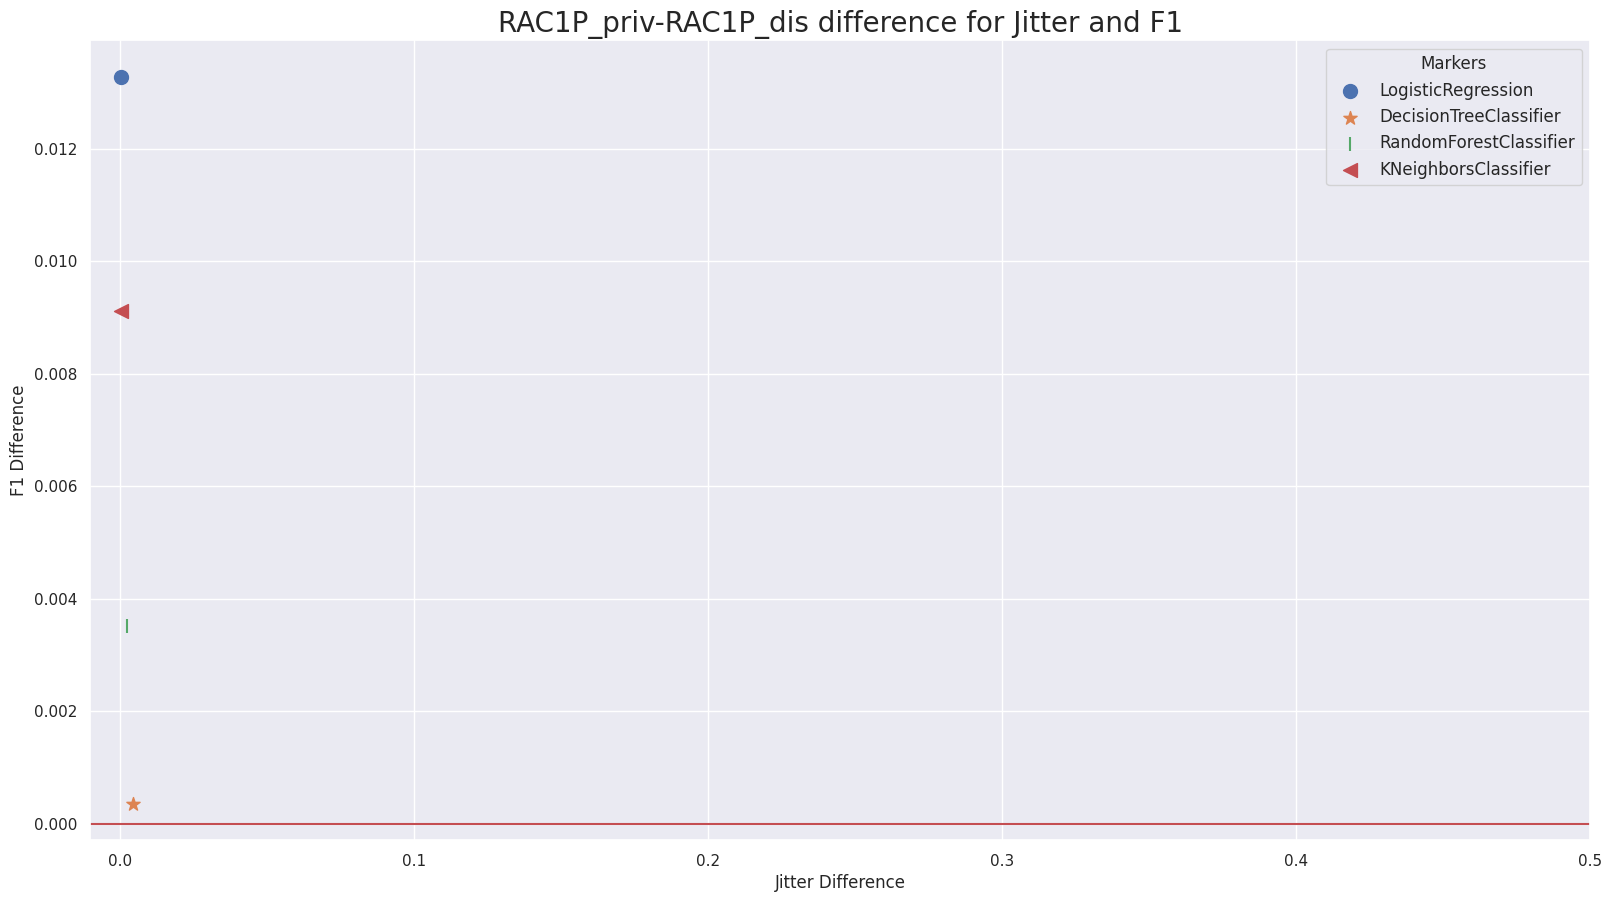

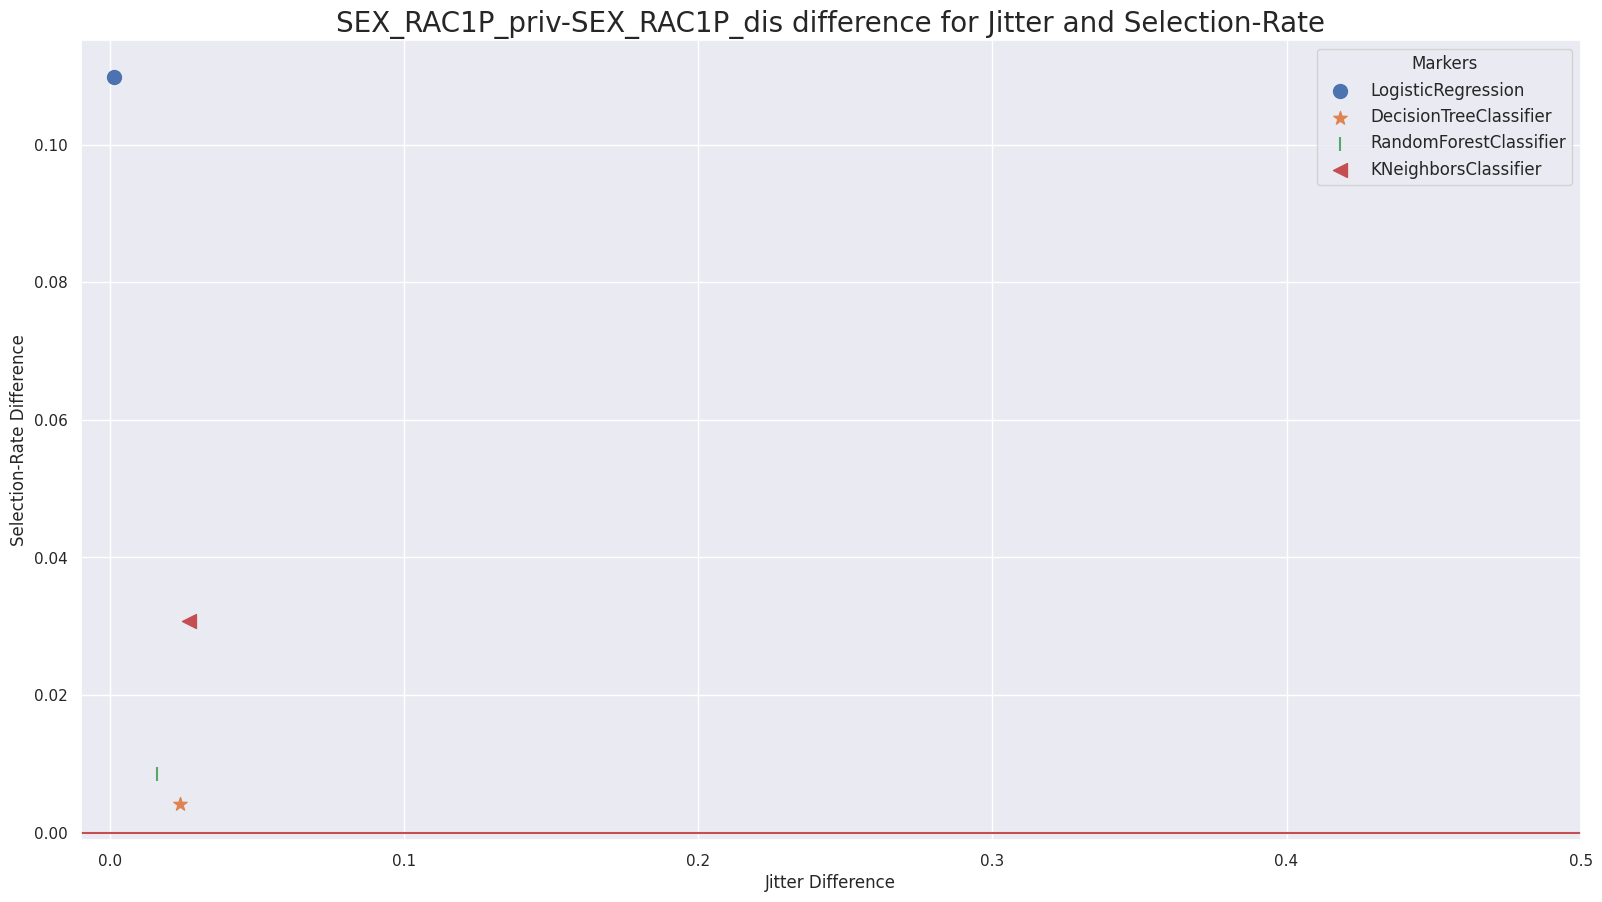

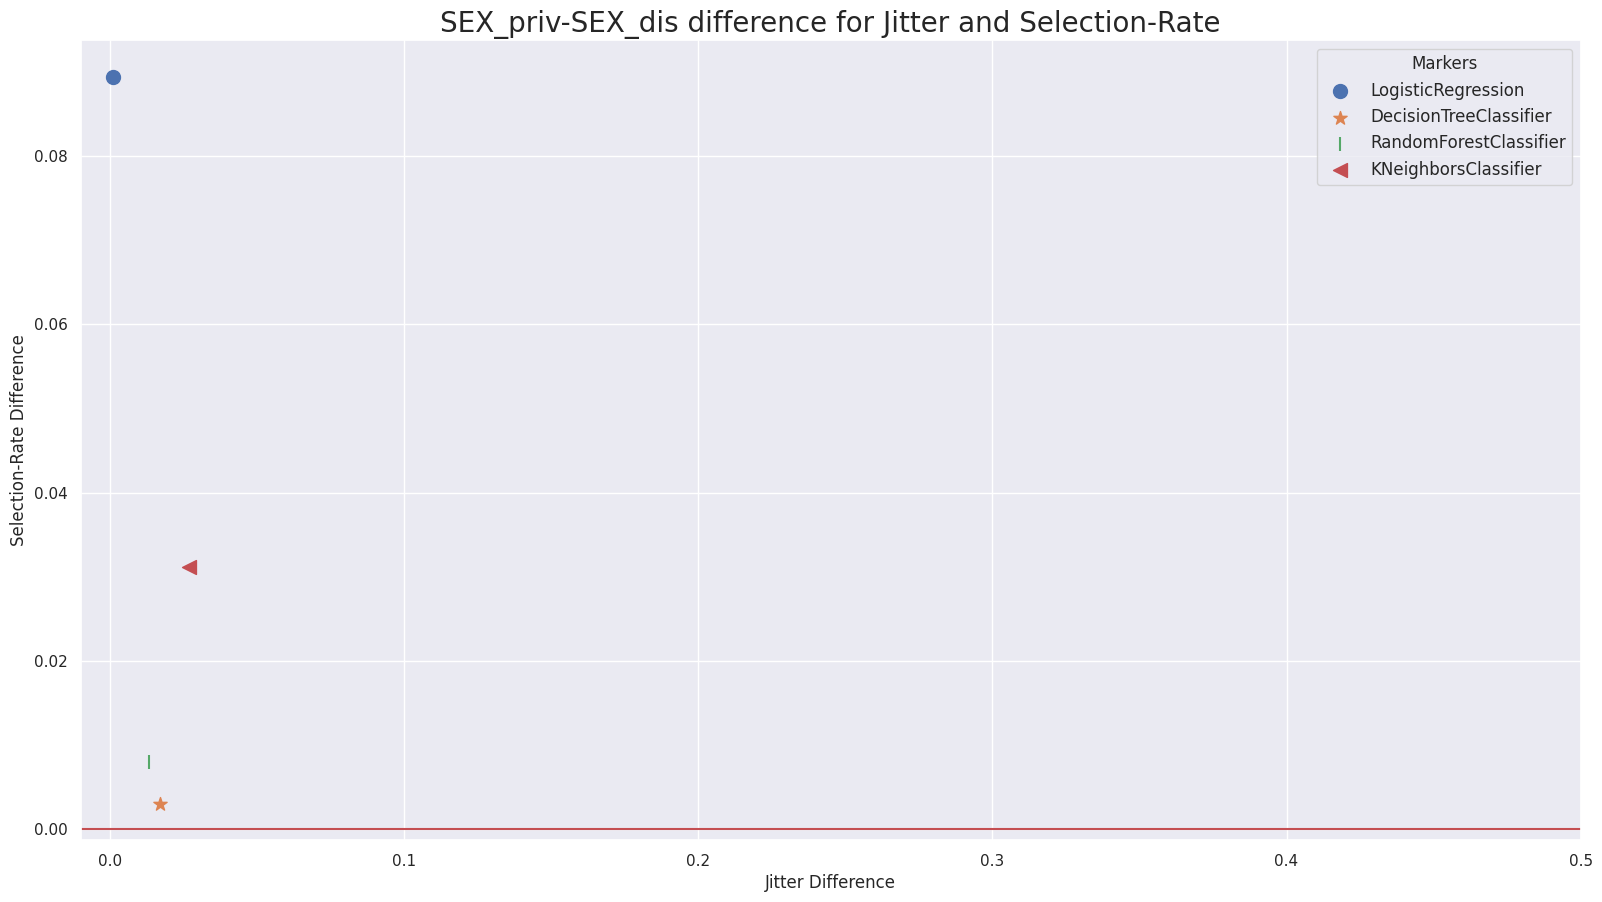

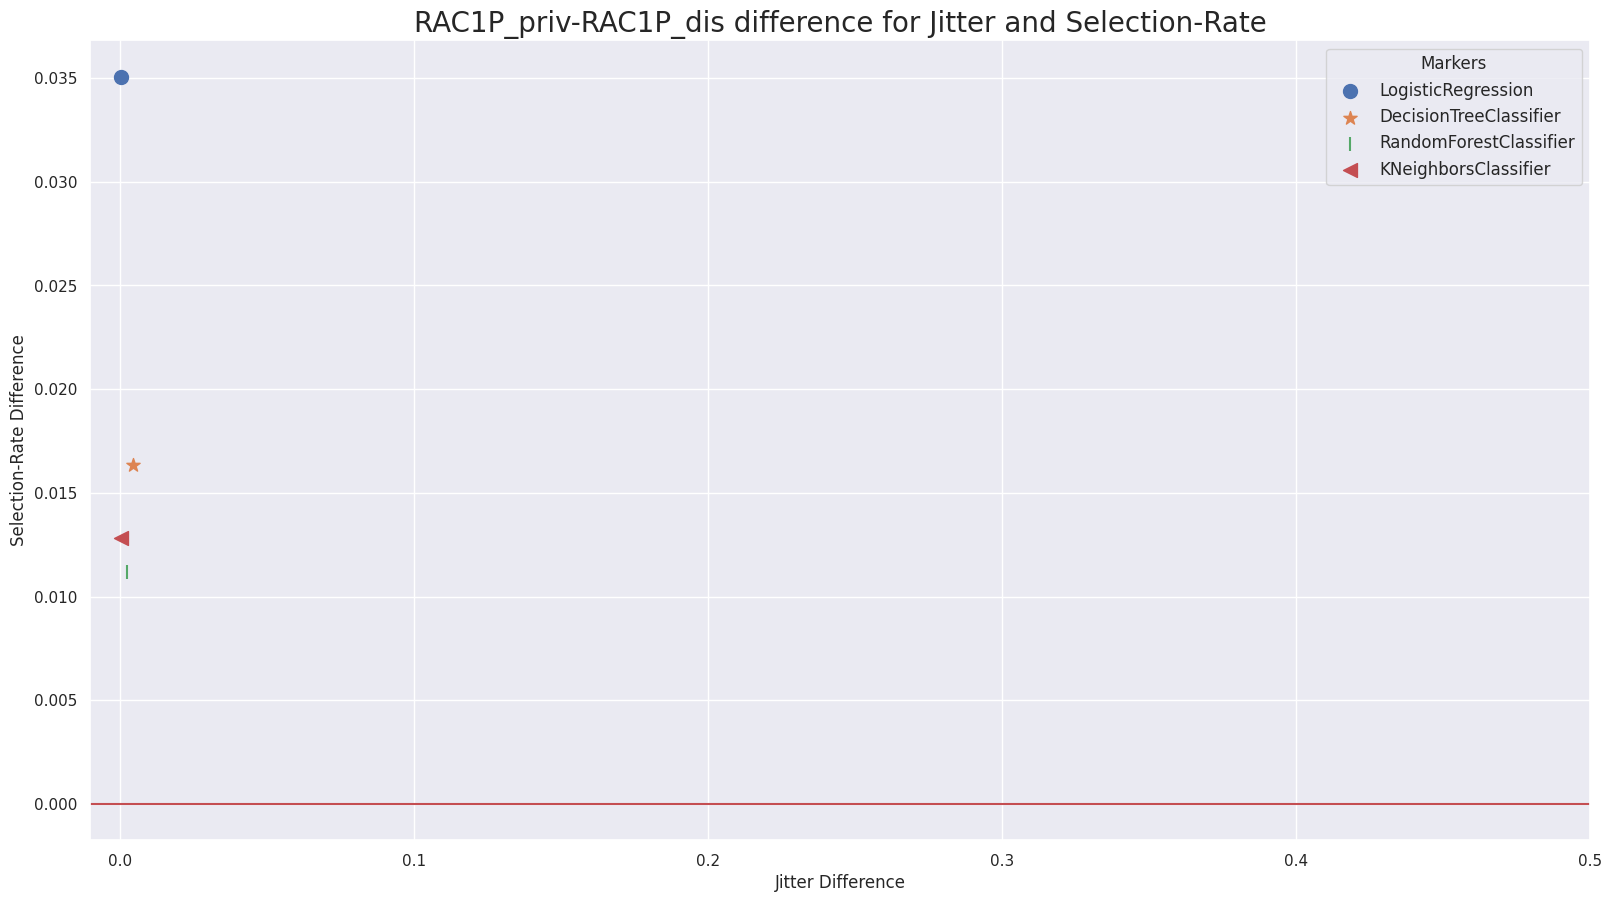

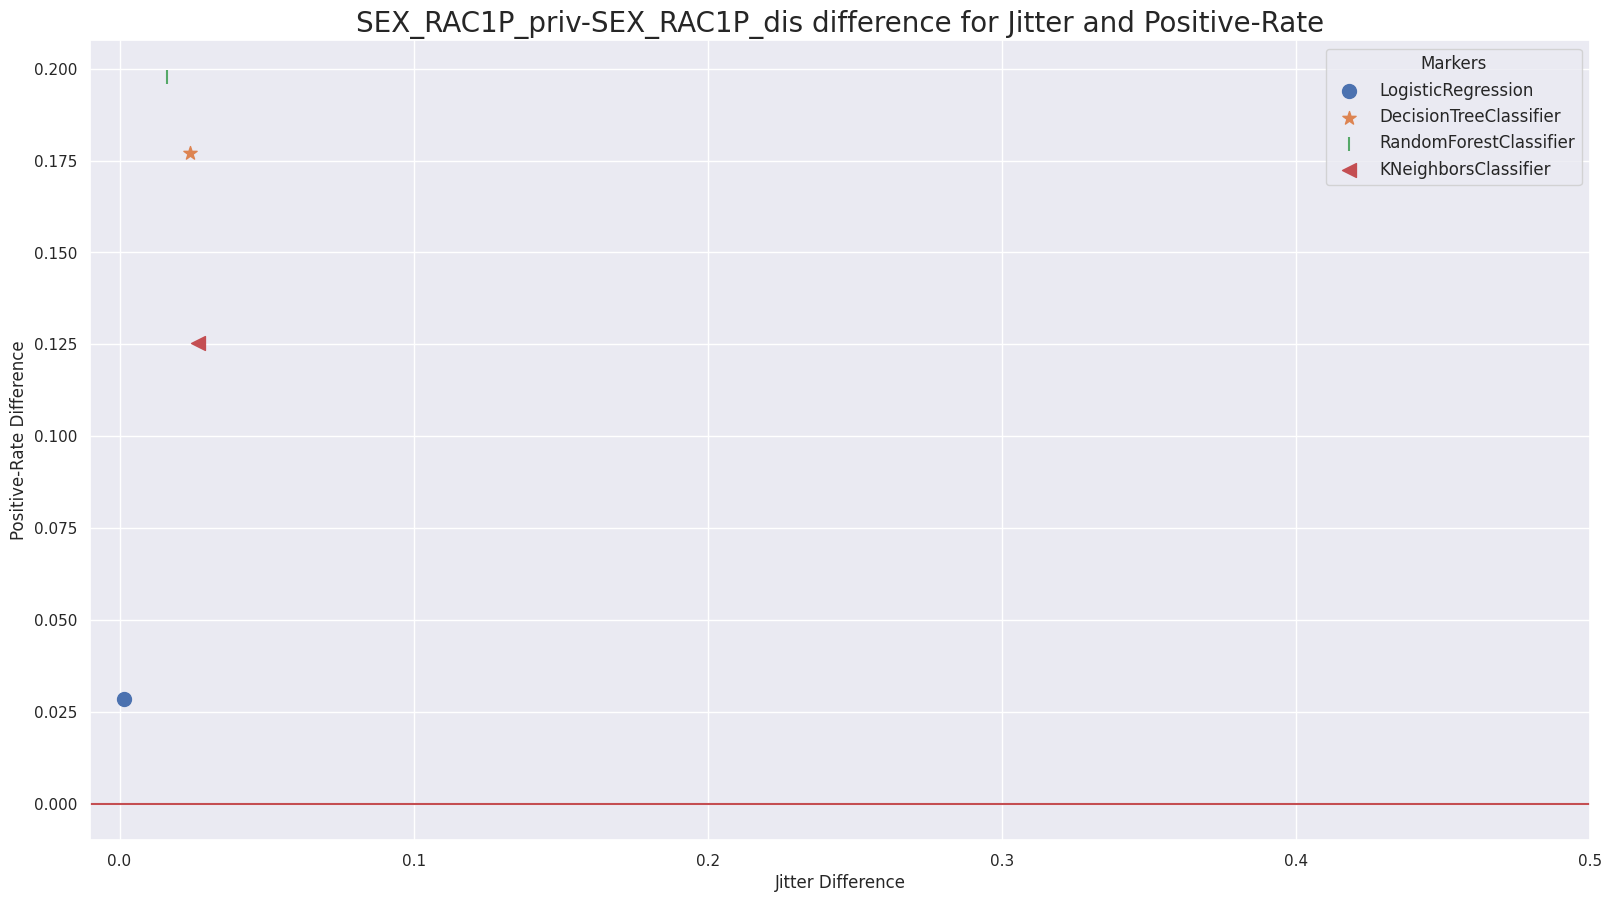

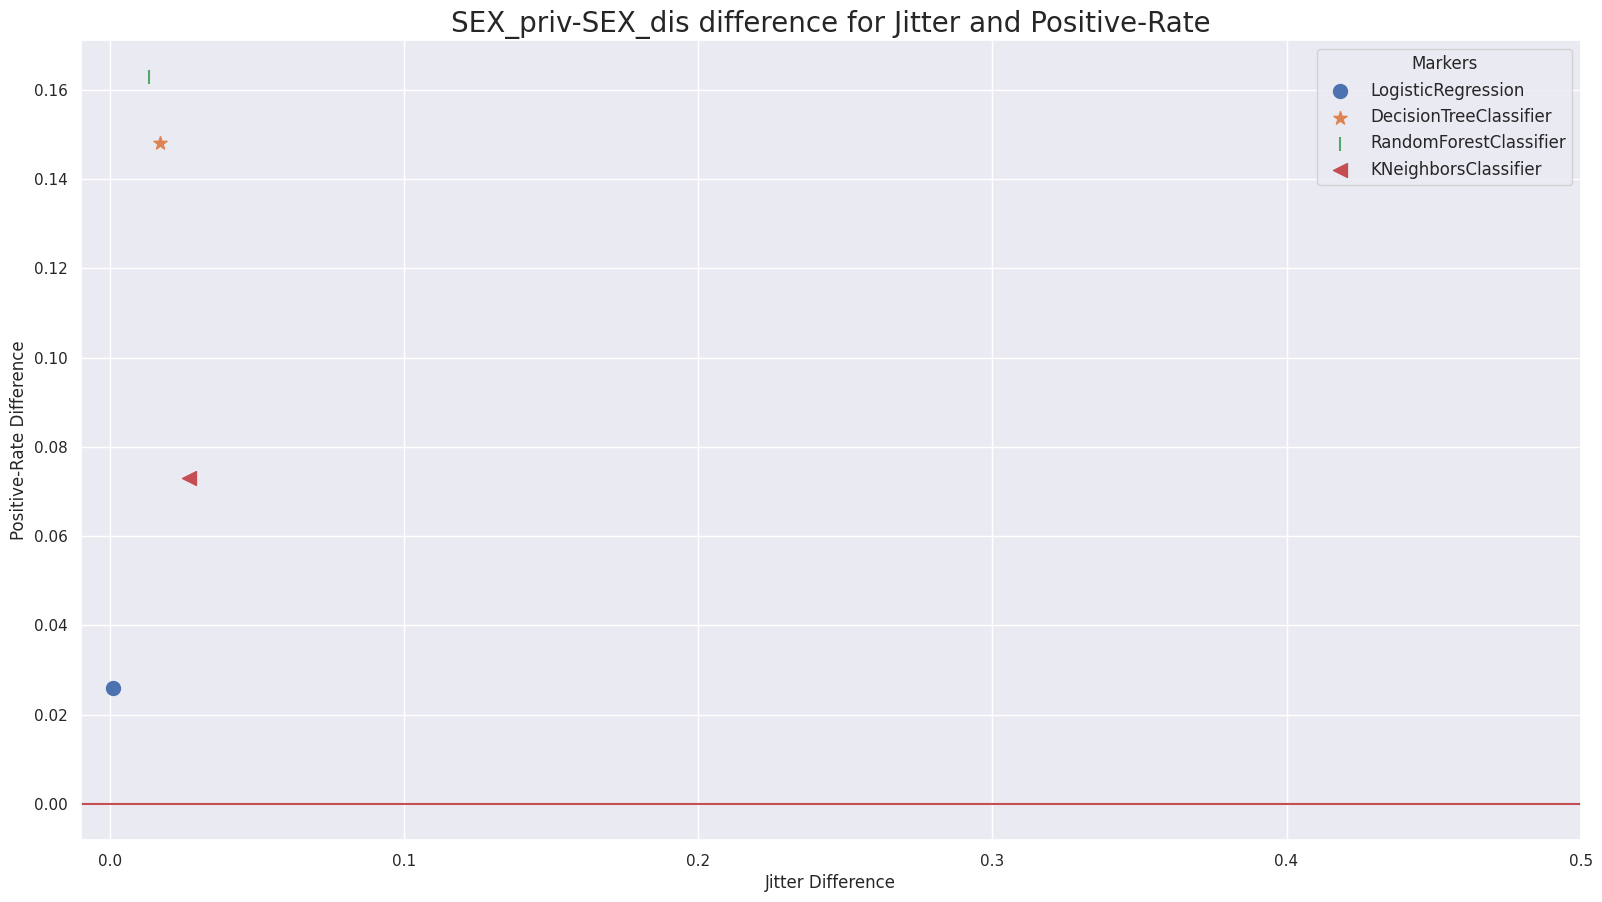

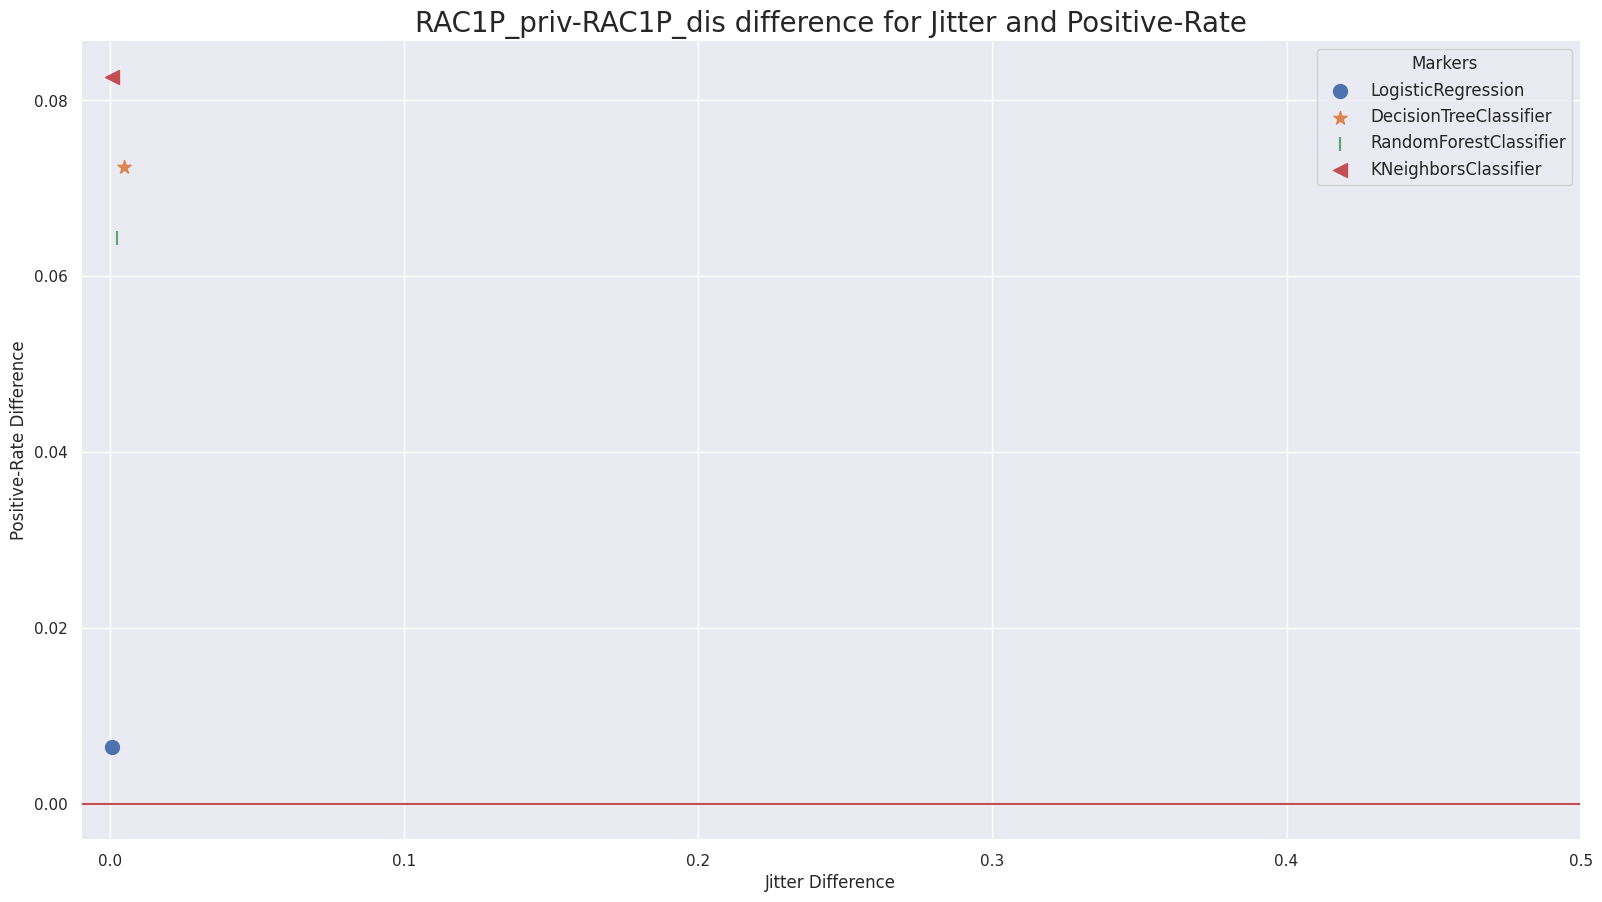

In [69]:
visualize_fairness_metrics_for_prediction_metric(models_average_results_dct,
                                                 x_metric='Jitter',
                                                 y_metrics=['TPR', 'Accuracy', 'F1', 'Selection-Rate', 'Positive-Rate'])

### STD

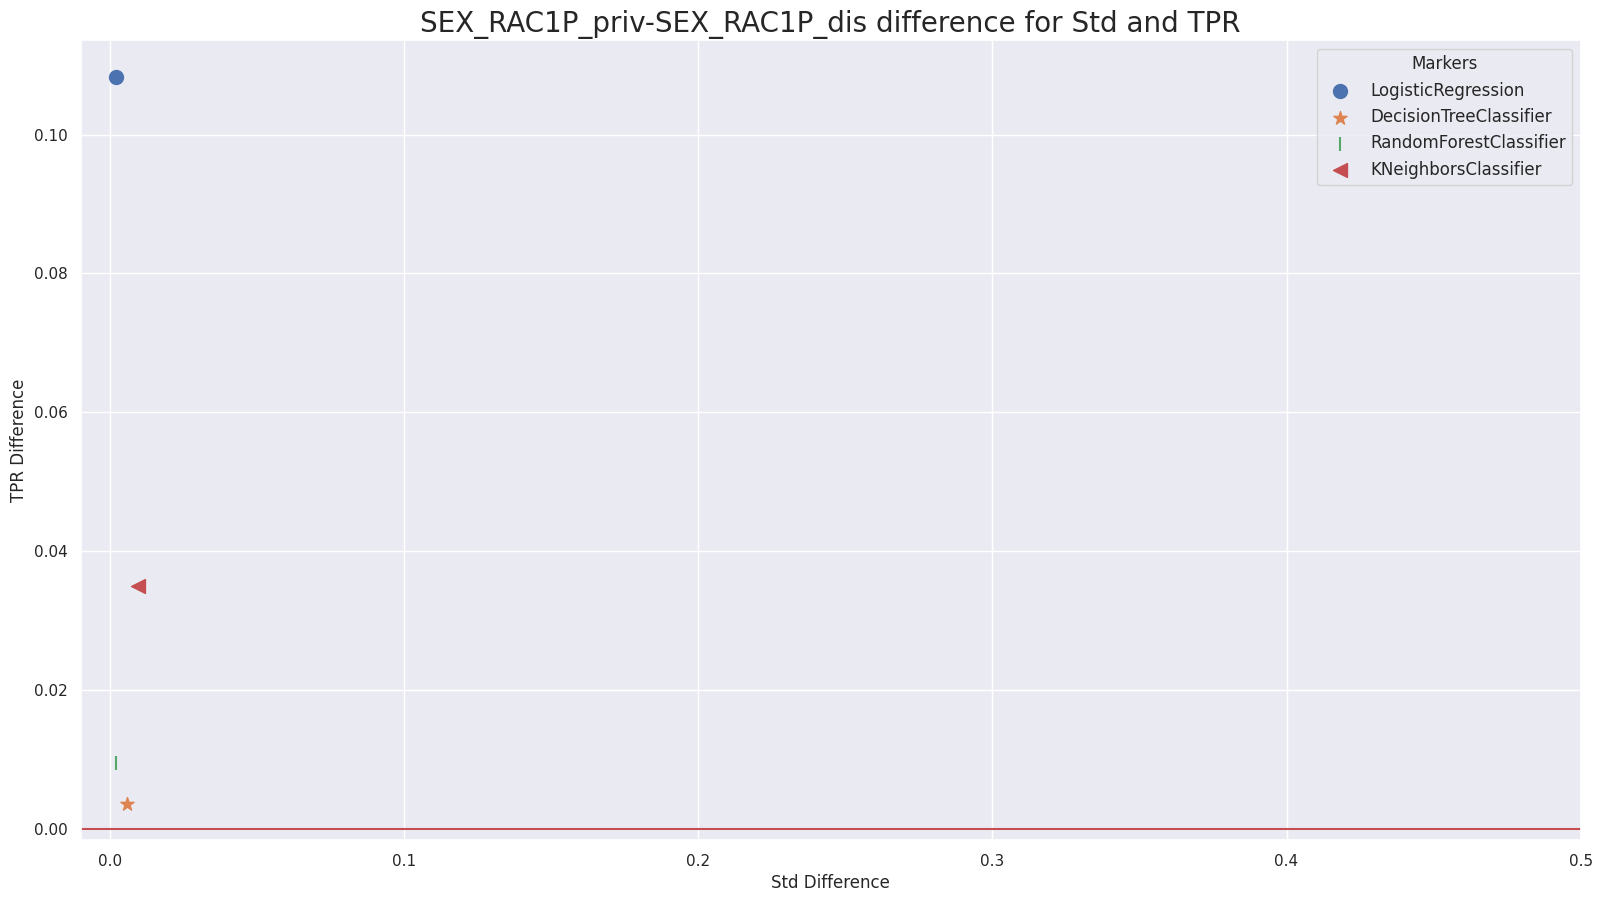

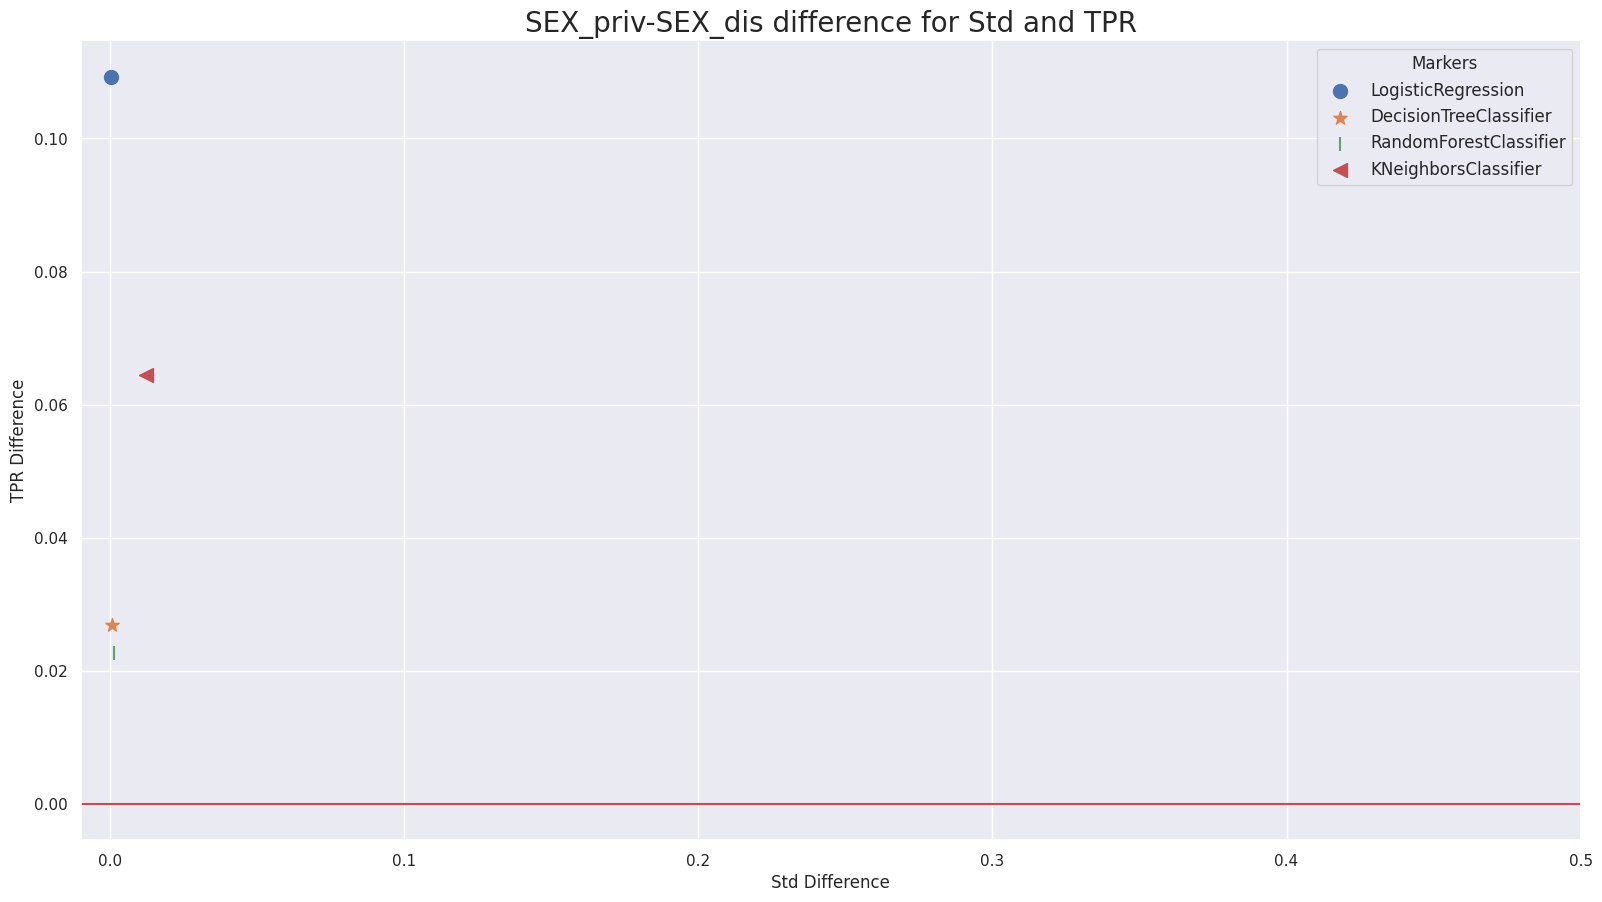

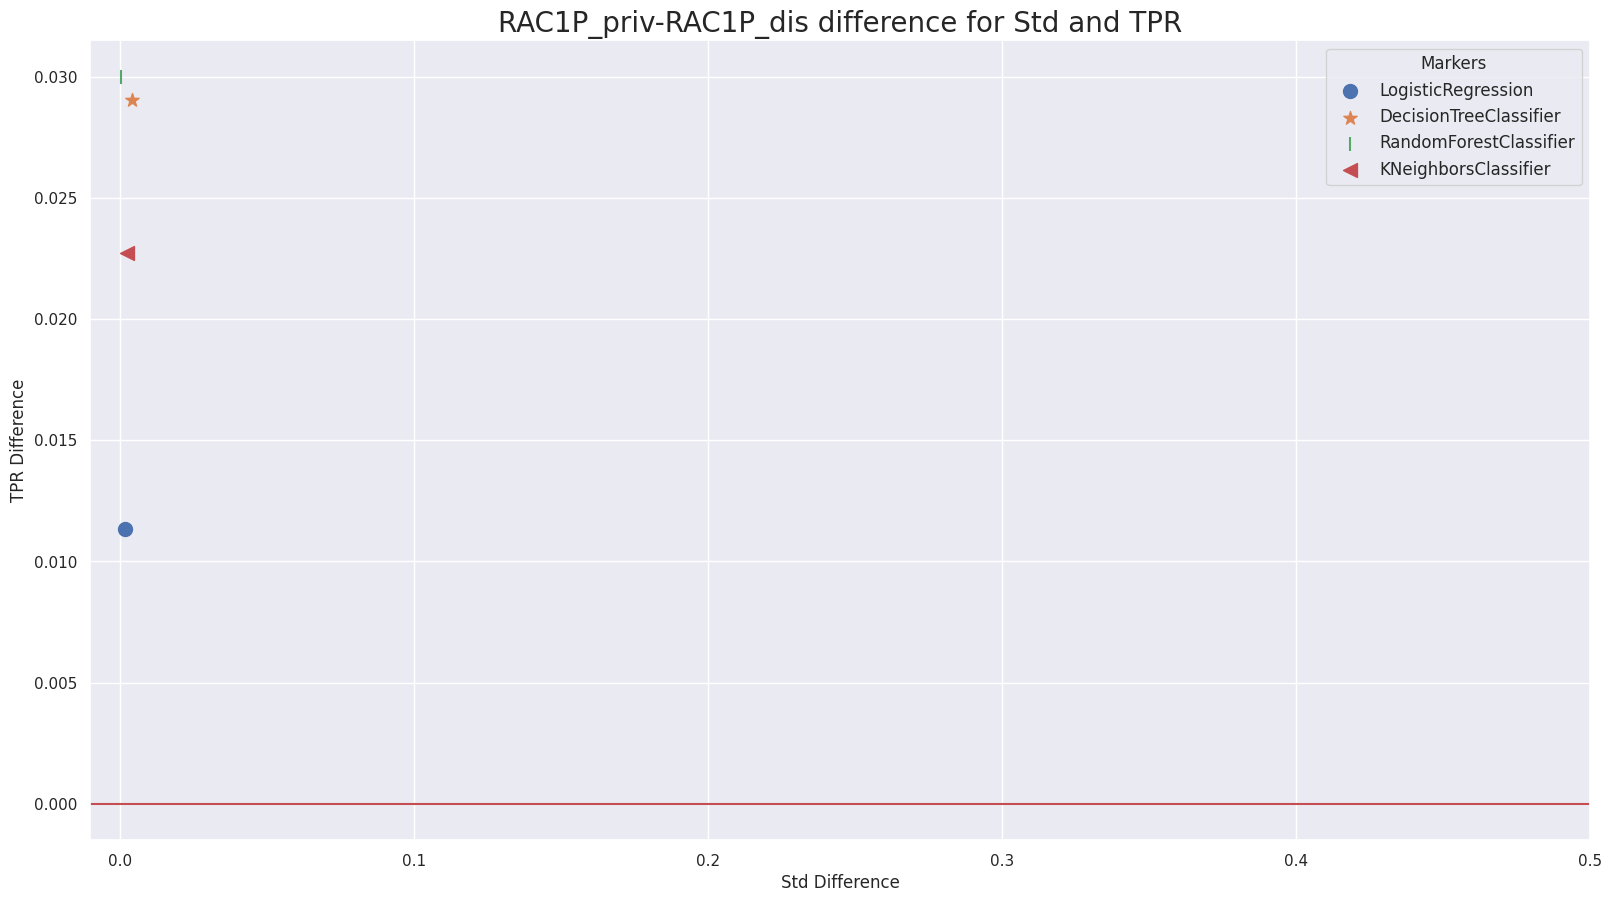

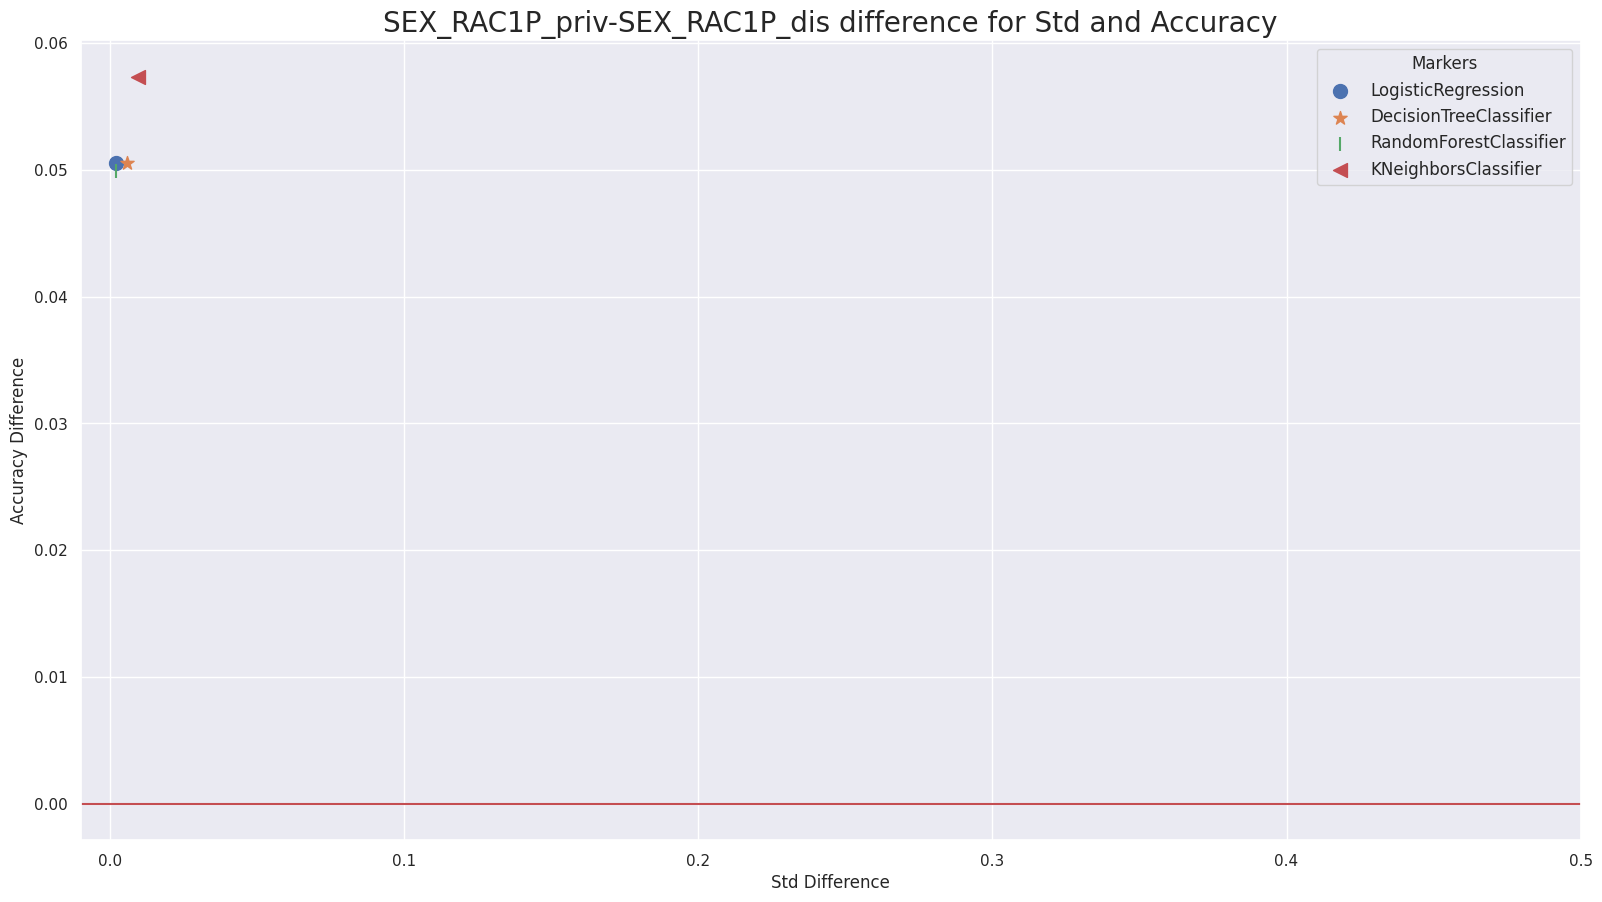

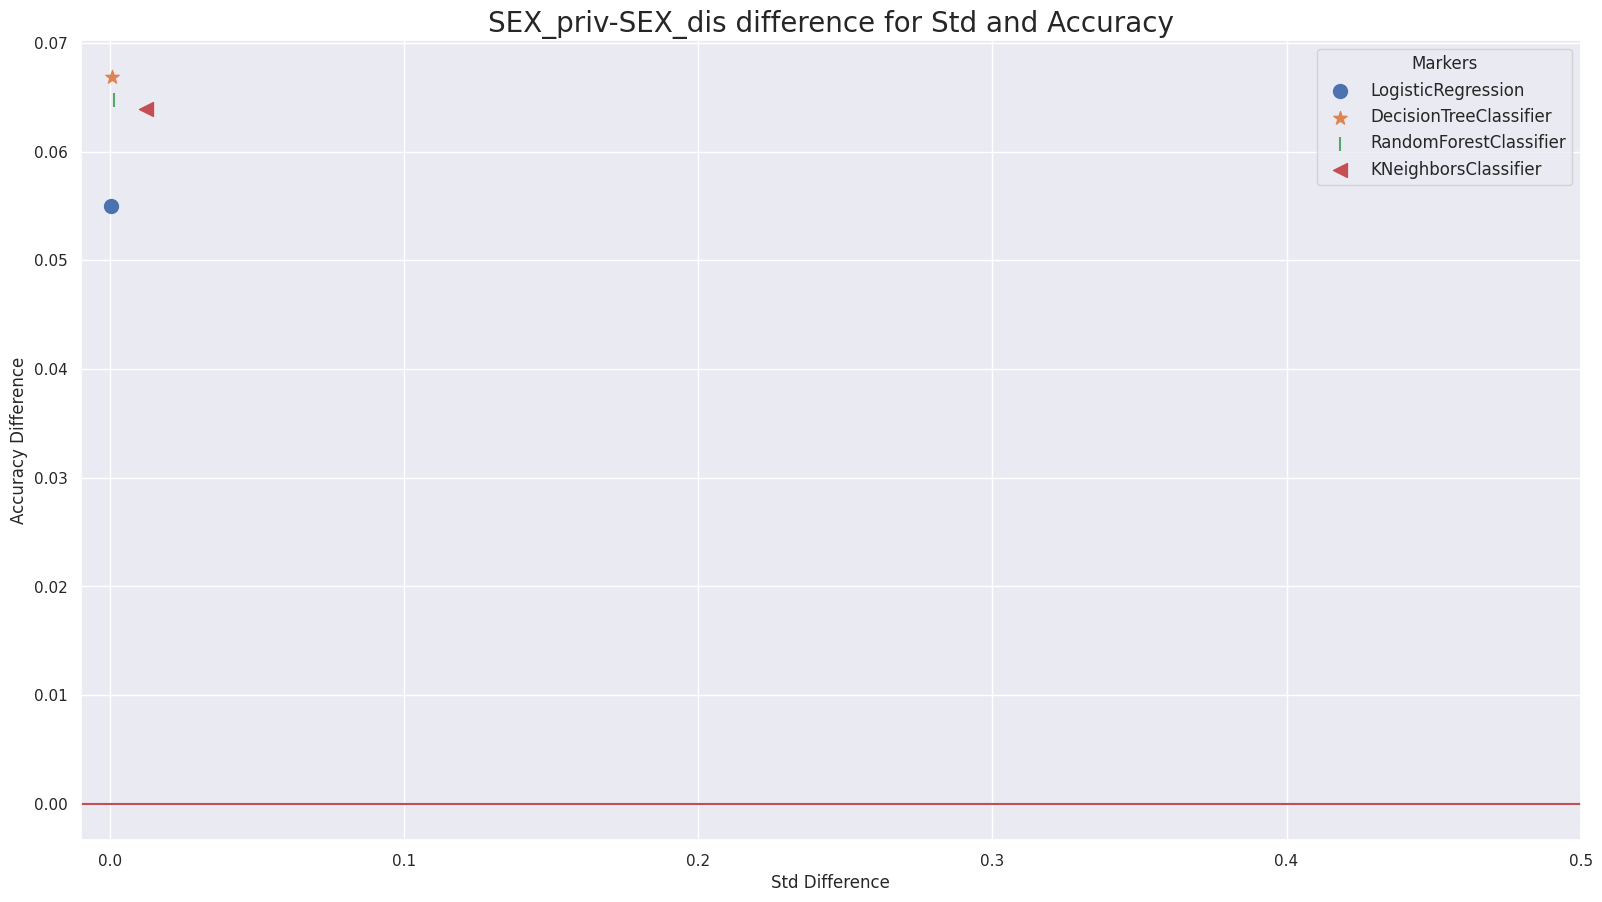

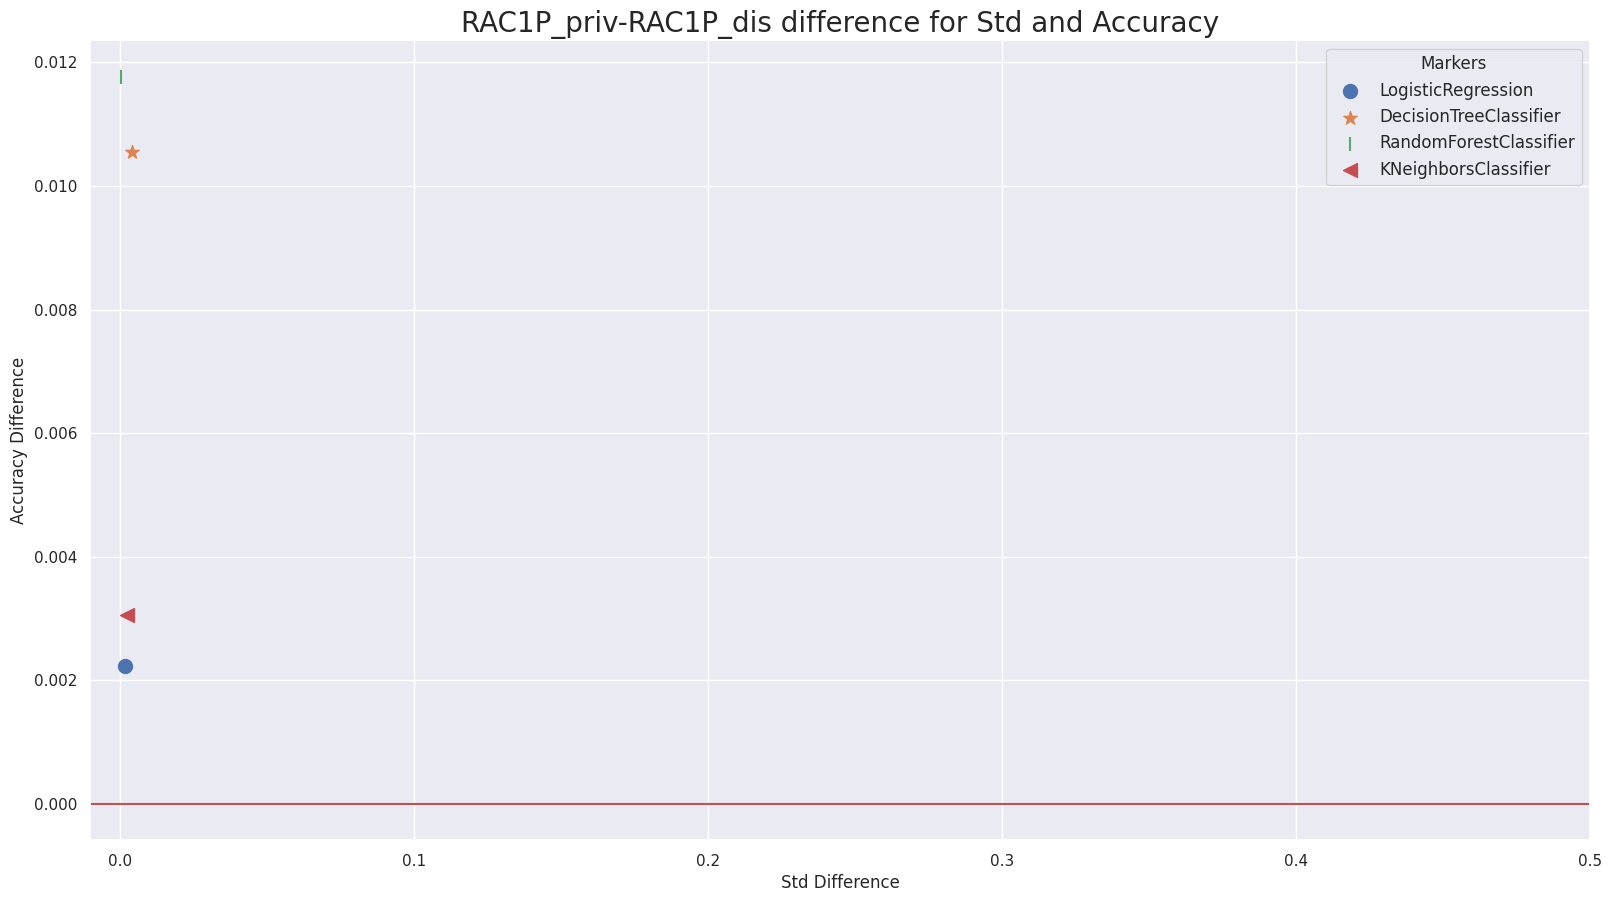

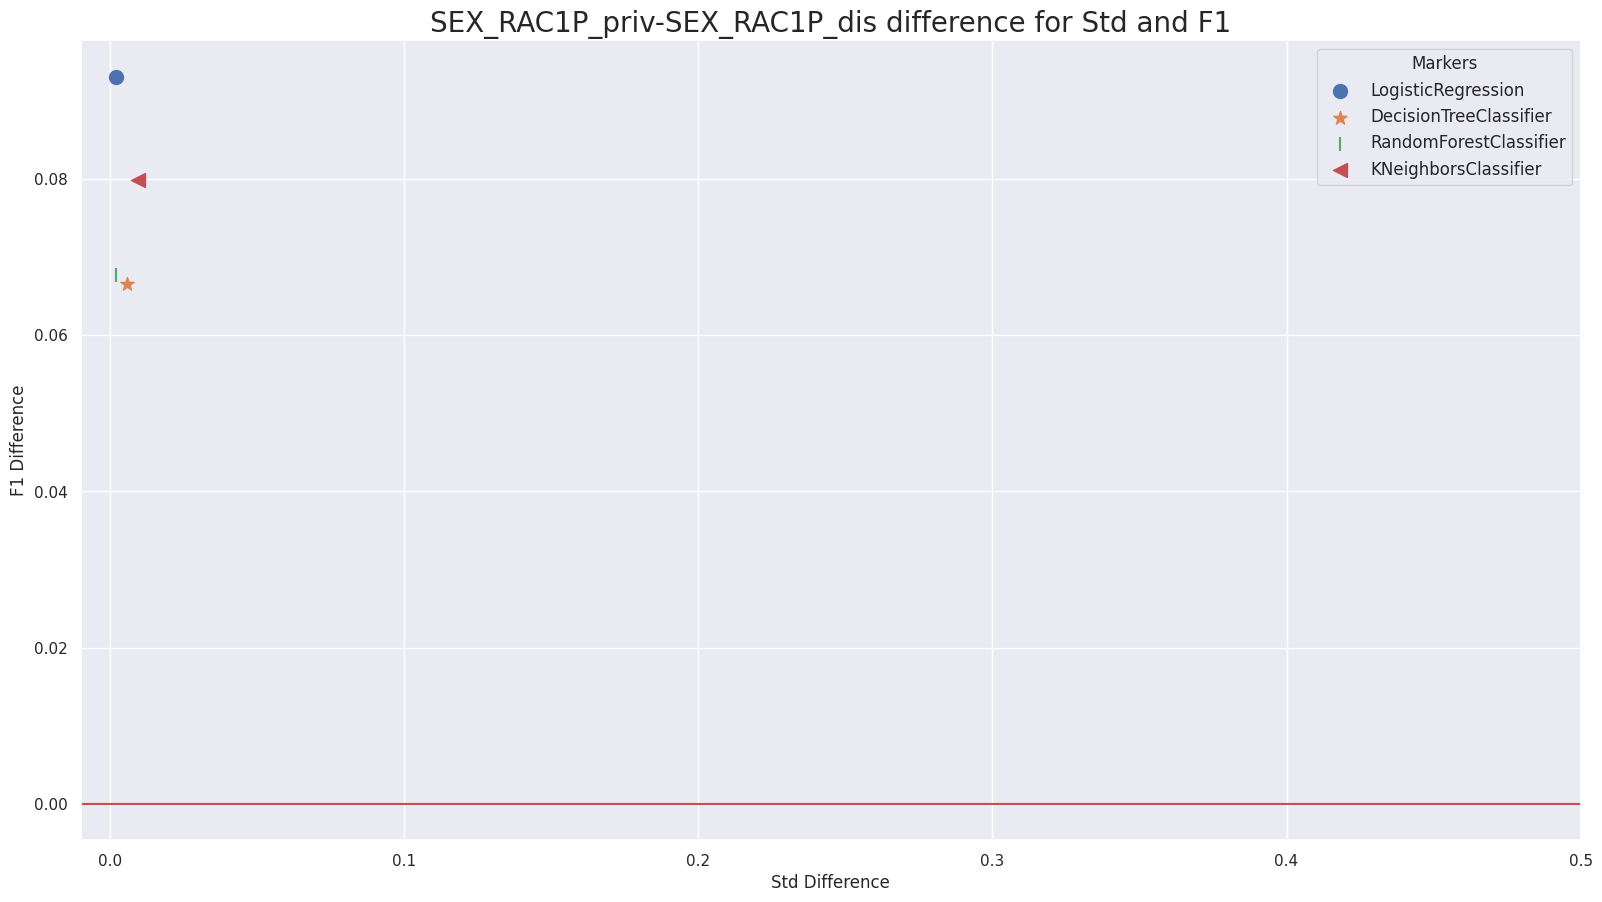

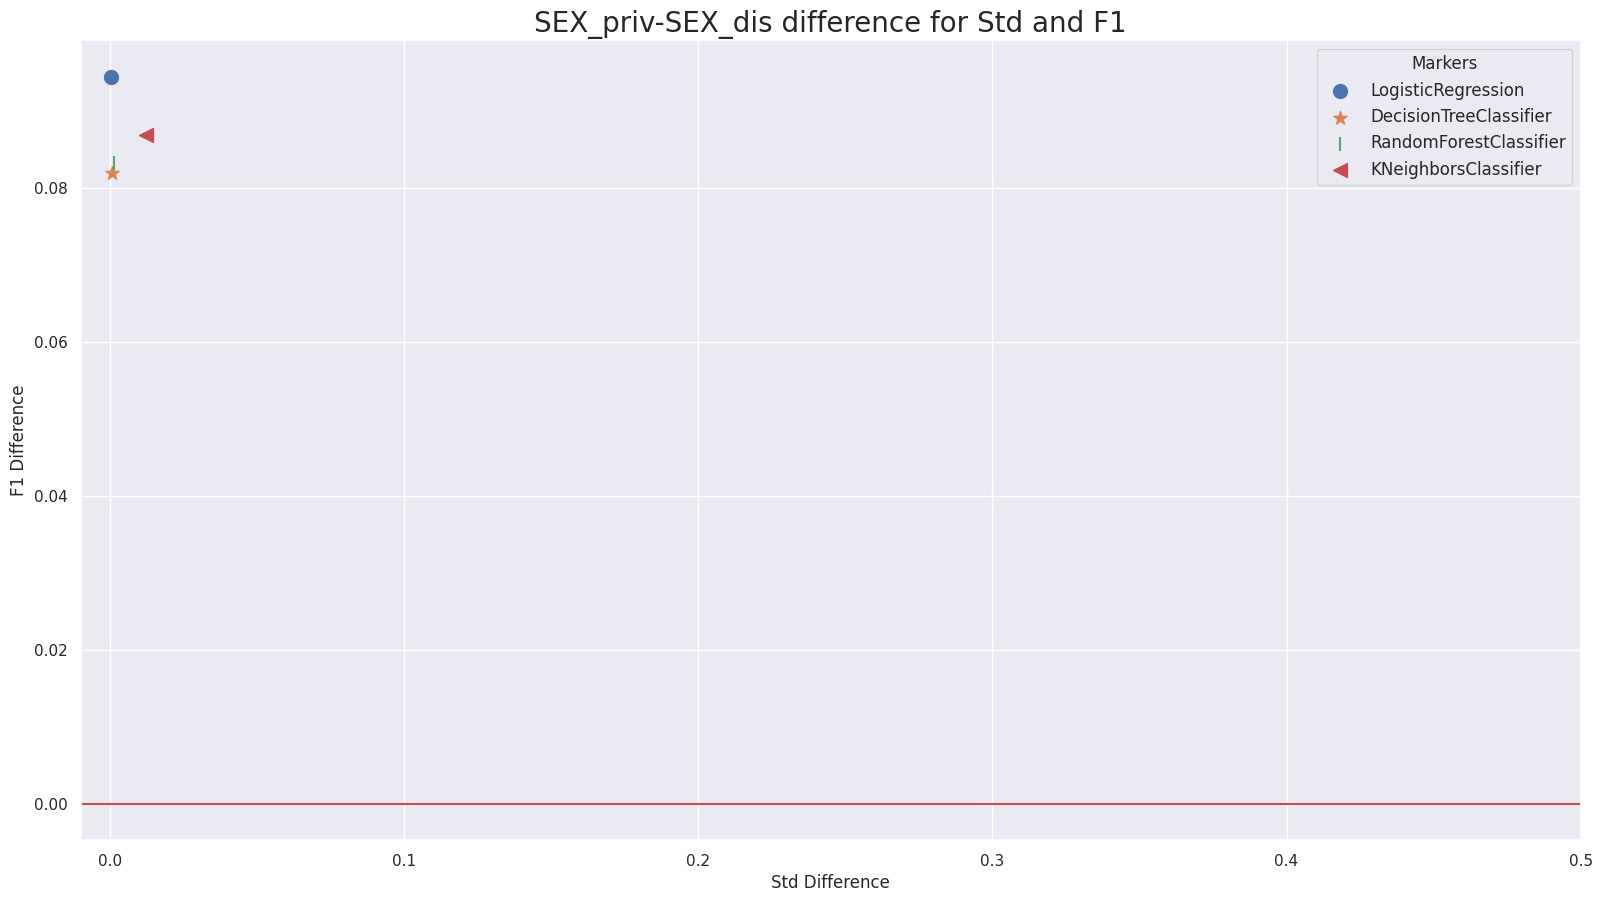

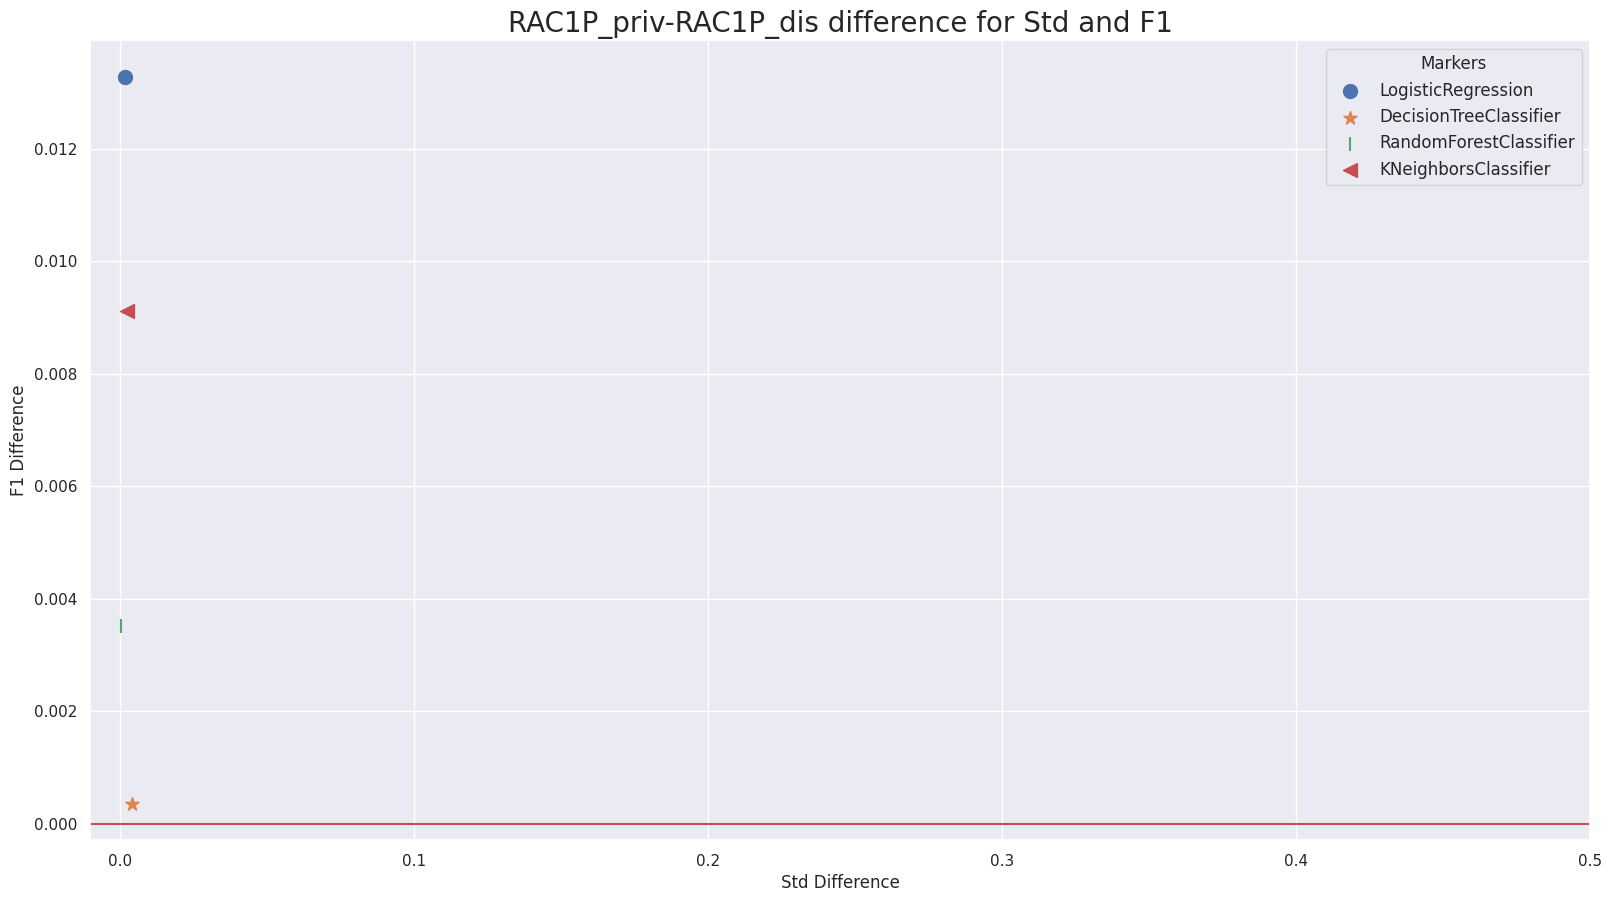

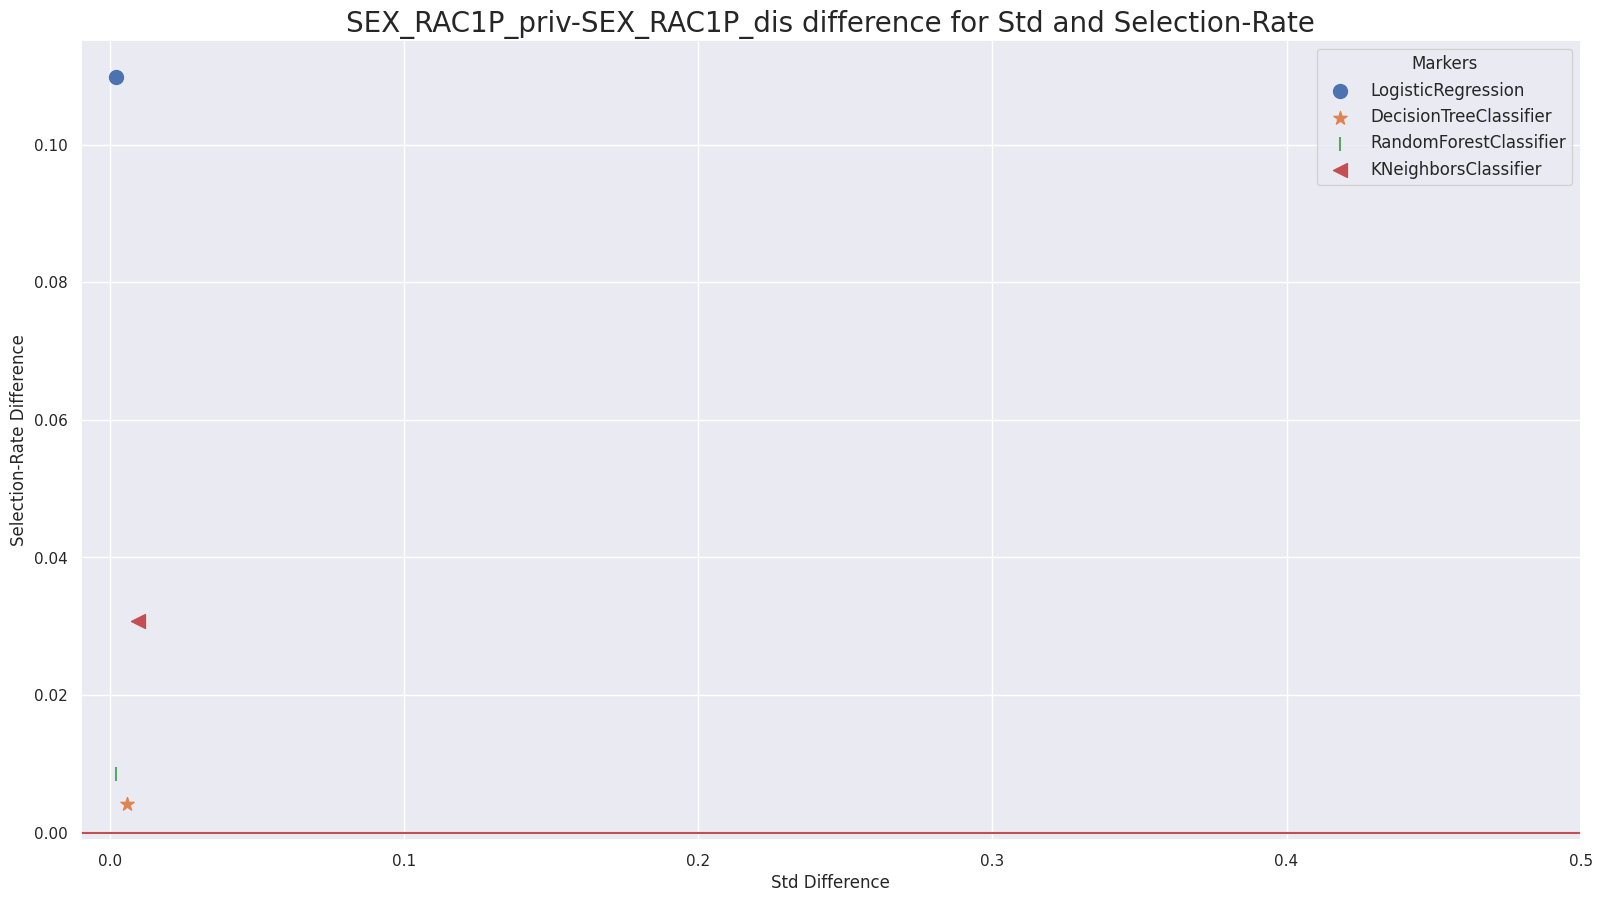

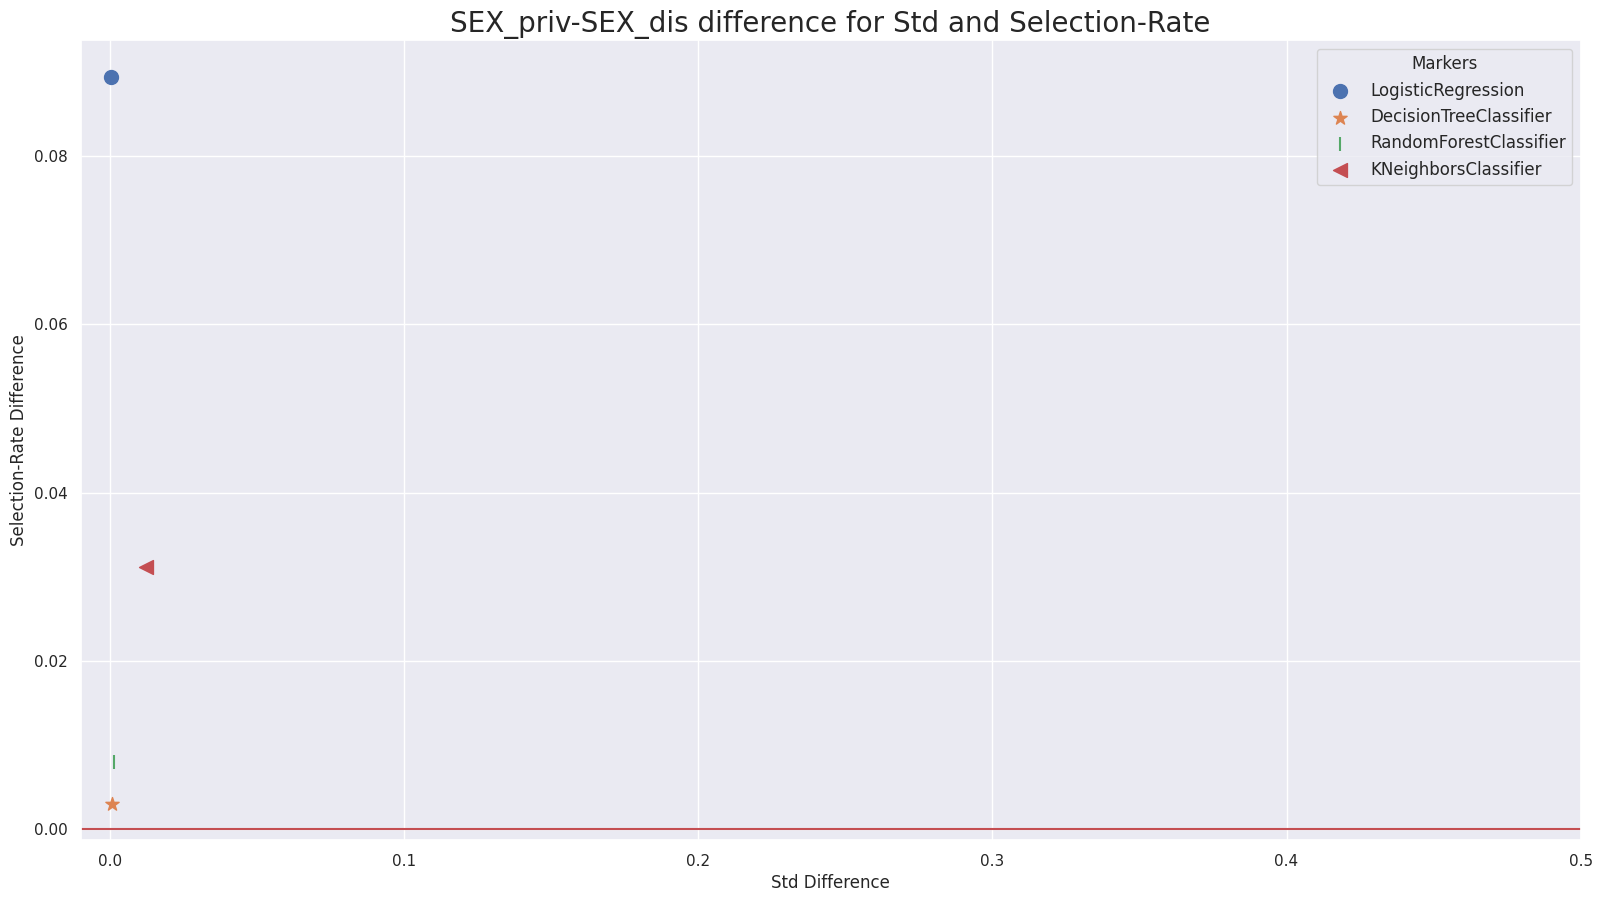

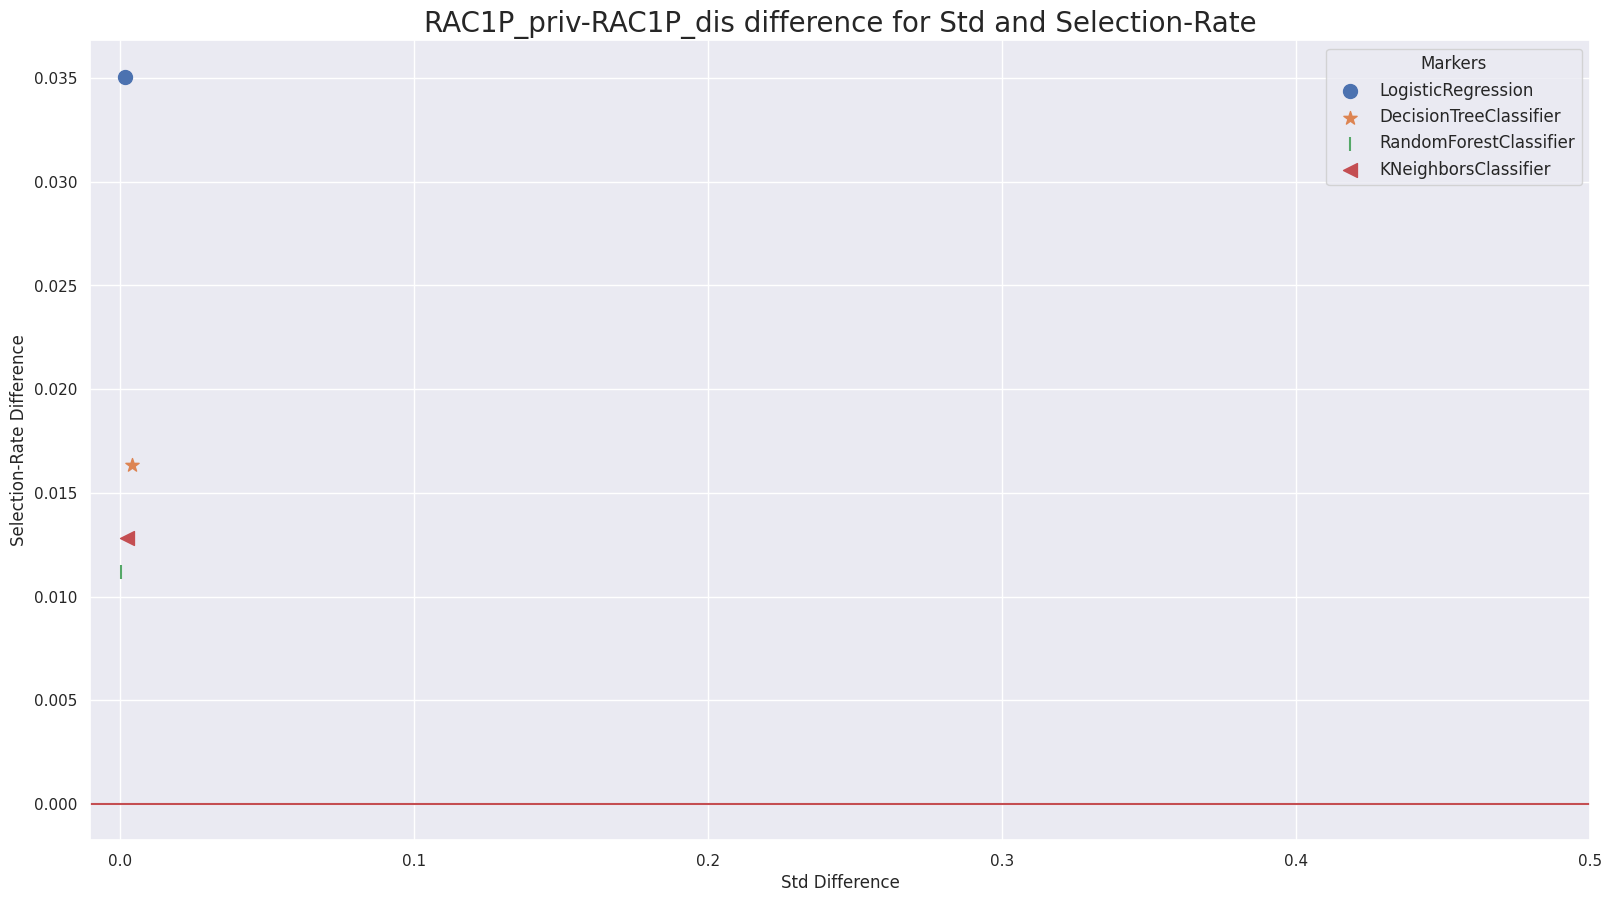

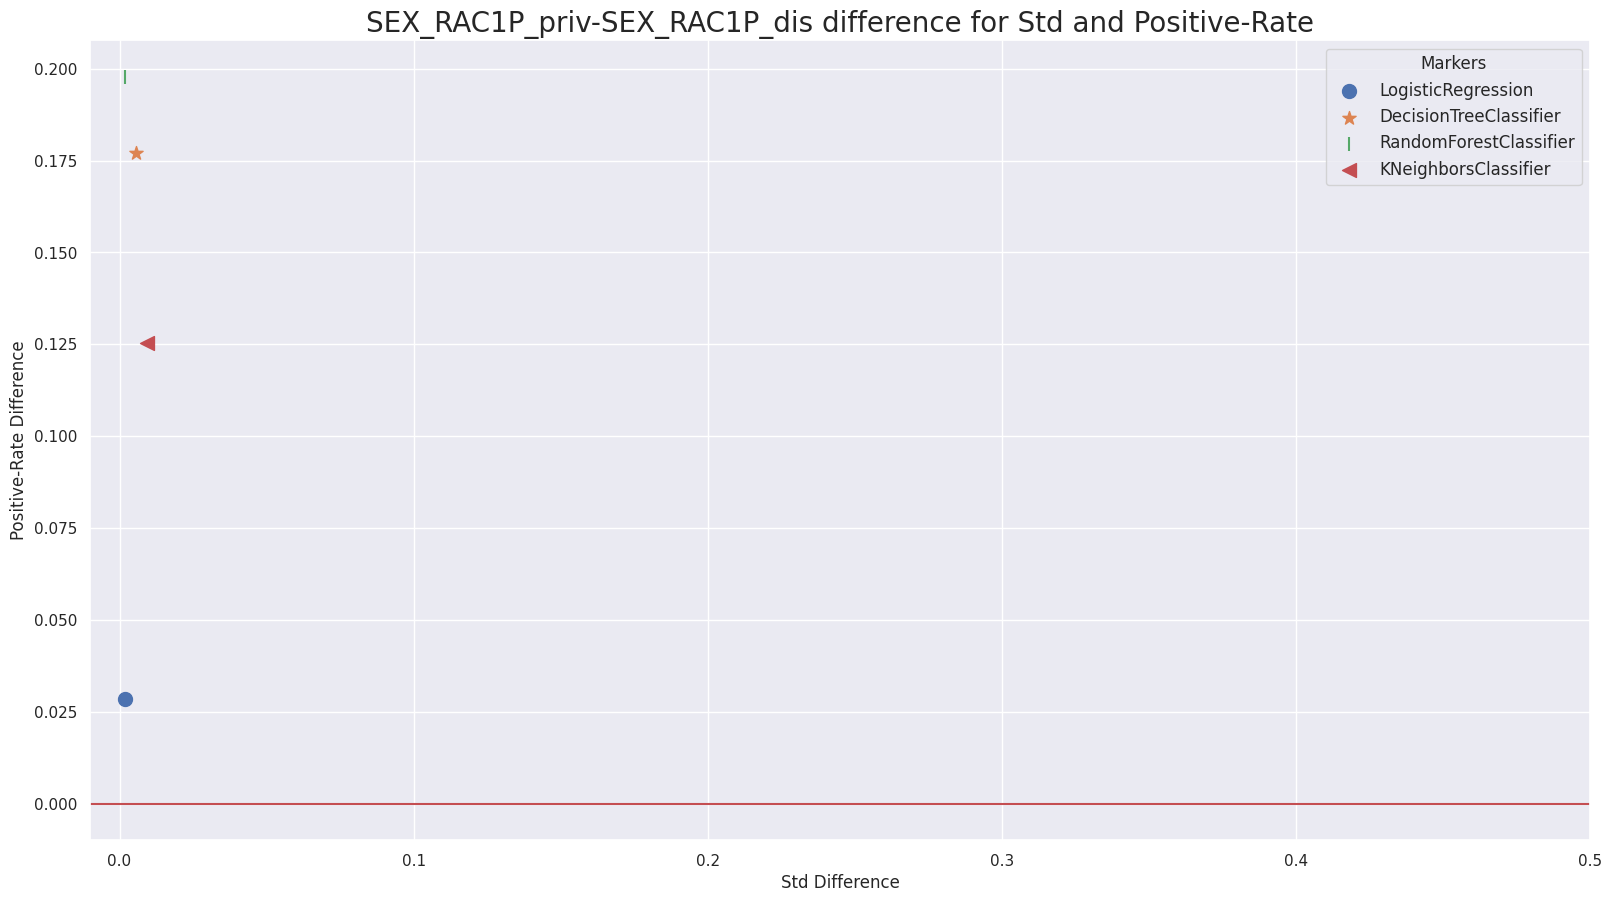

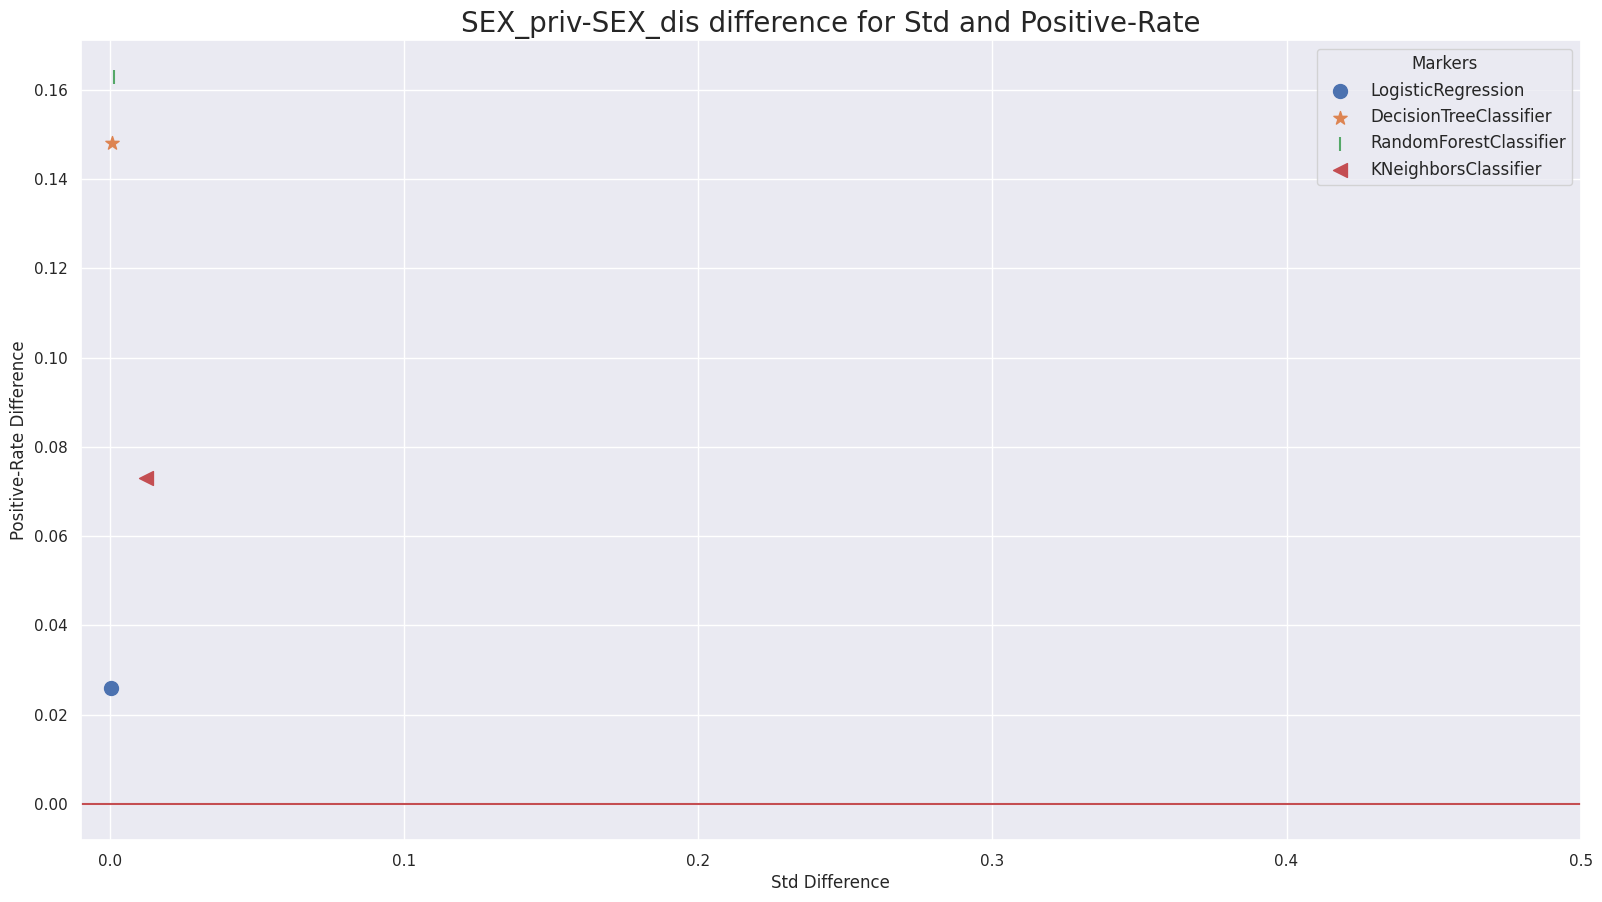

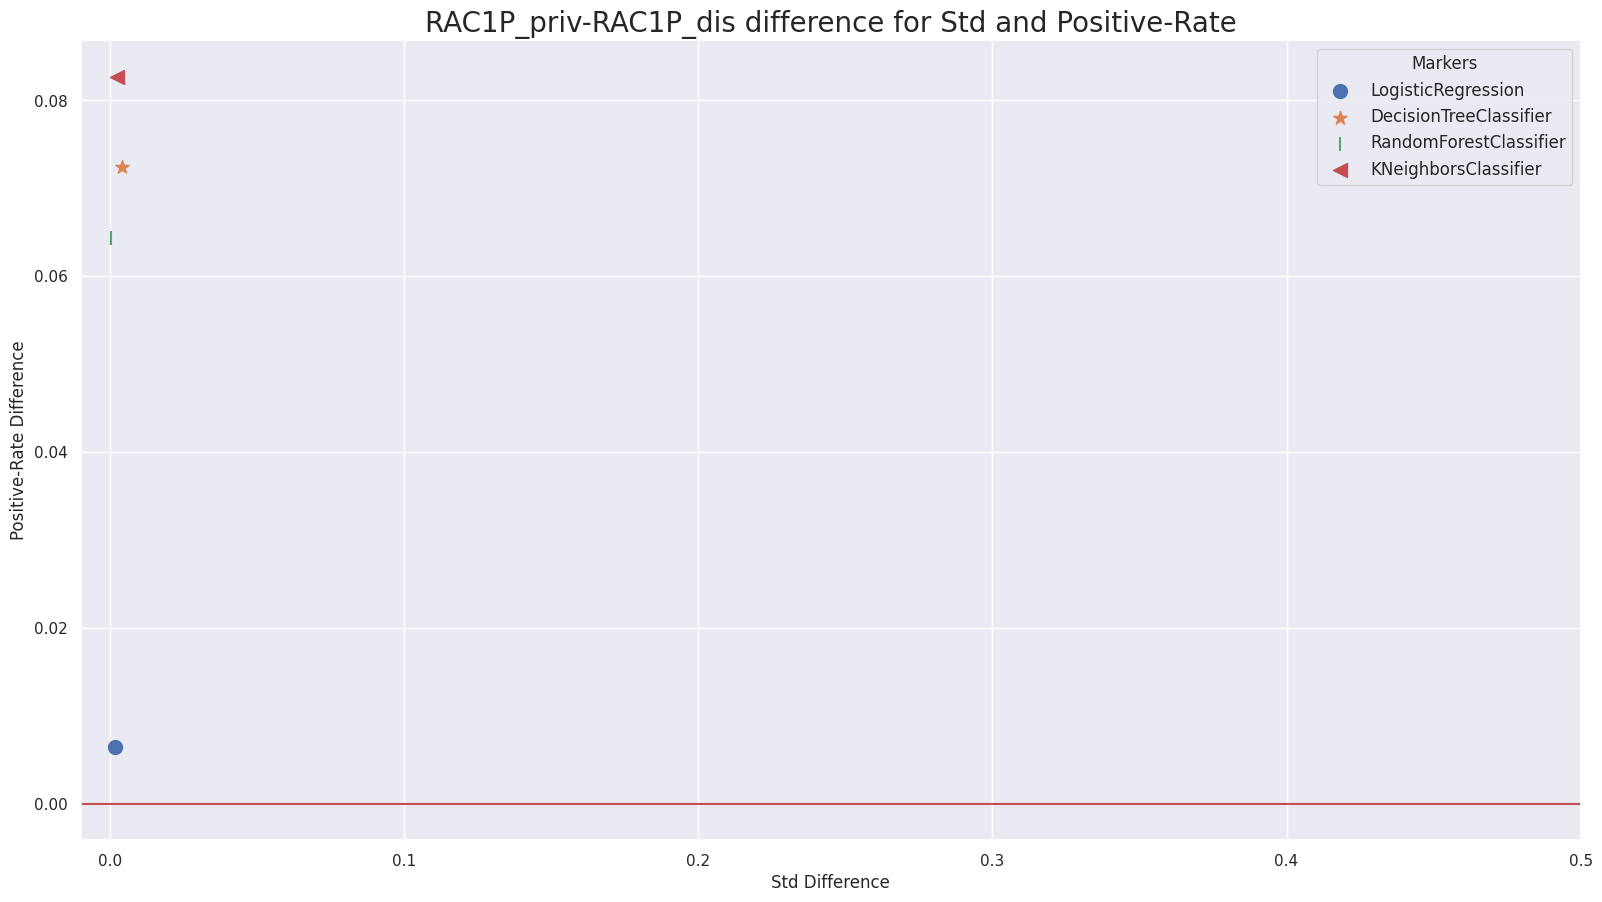

In [70]:
visualize_fairness_metrics_for_prediction_metric(models_average_results_dct,
                                                 x_metric='Std',
                                                 y_metrics=['TPR', 'Accuracy', 'F1', 'Selection-Rate', 'Positive-Rate'])